<a href="https://colab.research.google.com/github/chris051091/Tesis_Maestria/blob/main/anomalias/src/Anomalias_palanquero_20h_7h_nuevodatospwv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta
import matplotlib.cm as cm
from functools import reduce
from math import cos, sin, atan, pi
from windrose import WindroseAxes
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_DADOS_EVENTOS = '/dados/'
PATH_ANOMALIAS = '/anomalias/'
NOMBRE_ESTACION = 'palanquero'
FILE_DATOS_ESTACION = 'eventos_palanquero_2.csv'

LISTA_VAR = ['temp', 'hum', 'pres']
LISTA_PWV = ['pwv']
LISTA_VAR_10M = ['viento']
LISTA_PREC = ['prec']

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'
FILES_TRATADOS = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR]
FILES_PWV = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}_nuevo.csv' for VAR in LISTA_PWV]
FILES_TRATADOS_10M = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR_10M]
FILES_TRATADOS_PREC = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_PREC]

PATH_FINAL_FIGURAS_ANOMALIAS = PATH_DRIVE + PATH_ANOMALIAS + NOMBRE_ESTACION

Cargando datos de Temp, Hum, Pres

In [4]:
dfList = []
for f in FILES_TRATADOS:
  df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(df)

In [5]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
df = df.sort_values(by=['FECHA']).reset_index(drop = True)
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

Cargando datos de Vapor de Agua

In [6]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV = dfPWV.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV = dfPWV.loc[~dfPWV[var].isnull()].reset_index(drop = True)

  dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPWV = pd.DataFrame(columns = ['FECHA'])

In [7]:
dfPWV

FECHA_HORA        PWV                      FECHA
0      2011-01-01 00  48.345833  2011-01-01 00:00:00-05:00
1      2011-01-01 01  48.823333  2011-01-01 01:00:00-05:00
2      2011-01-01 02  49.310000  2011-01-01 02:00:00-05:00
3      2011-01-01 03  48.910000  2011-01-01 03:00:00-05:00
4      2011-01-01 09  46.825000  2011-01-01 09:00:00-05:00
...              ...        ...                        ...
40495  2017-12-31 19  52.657500  2017-12-31 19:00:00-05:00
40496  2017-12-31 20  53.710000  2017-12-31 20:00:00-05:00
40497  2017-12-31 21  55.233333  2017-12-31 21:00:00-05:00
40498  2017-12-31 22  56.612500  2017-12-31 22:00:00-05:00
40499  2017-12-31 23  57.475000  2017-12-31 23:00:00-05:00

[40500 rows x 3 columns]

## Datos de PWV sin agrupar por hora (Formato de 5 minutos)

In [8]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV_5m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV_5m = dfPWV_5m.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV_5m['FECHA_HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV_5m = dfPWV_5m.loc[~dfPWV_5m[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

else:
  dfPWV_5m = pd.DataFrame(columns = ['FECHA'])

In [9]:
dfPWV_5m

FECHA    PWV     FECHA_HORA
0       2011-01-01 00:00:00-05:00  48.13  2011-01-01 00
1       2011-01-01 00:05:00-05:00  48.16  2011-01-01 00
2       2011-01-01 00:10:00-05:00  48.19  2011-01-01 00
3       2011-01-01 00:15:00-05:00  48.20  2011-01-01 00
4       2011-01-01 00:20:00-05:00  48.25  2011-01-01 00
...                           ...    ...            ...
479210  2017-12-31 23:35:00-05:00  57.51  2017-12-31 23
479211  2017-12-31 23:40:00-05:00  57.53  2017-12-31 23
479212  2017-12-31 23:45:00-05:00  57.55  2017-12-31 23
479213  2017-12-31 23:50:00-05:00  57.57  2017-12-31 23
479214  2017-12-31 23:55:00-05:00  57.57  2017-12-31 23

[479215 rows x 3 columns]

## Cargando datos de Vientos

$ \theta_p  = arctan(U_p / V_p) $ Direccíon del viento promedio

In [10]:
dfList = []
for f in FILES_TRATADOS_10M:
  dfaux = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(dfaux)

In [11]:
df10m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)

df10m['FECHA_HORA'] = df10m['FECHA'].apply(lambda x: x[0:13])
df10m['X_VIENTO'] = df10m['VELVIENTO'] * np.sin(np.deg2rad(df10m['DIRECVIENTO'] - 180))
df10m['Y_VIENTO'] = df10m['VELVIENTO'] * np.cos(np.deg2rad(df10m['DIRECVIENTO'] - 180))

dfViento = df10m.copy()

df10m = df10m.groupby('FECHA_HORA').agg({'X_VIENTO' : 'mean', 'Y_VIENTO' : 'mean' }).reset_index()
df10m['HORA'] = df10m['FECHA_HORA'].apply(lambda x: x[11:13])
df10m['FECHA'] = pd.to_datetime(df10m['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

In [12]:
df10m

FECHA_HORA  X_VIENTO  Y_VIENTO HORA                      FECHA
0      2011-01-02 00 -0.020676 -0.144283   00  2011-01-02 00:00:00-05:00
1      2011-01-02 01 -0.010329 -0.114271   01  2011-01-02 01:00:00-05:00
2      2011-01-02 02 -0.004356 -0.133153   02  2011-01-02 02:00:00-05:00
3      2011-01-02 03 -0.013790 -0.164974   03  2011-01-02 03:00:00-05:00
4      2011-01-02 04 -0.002036 -0.116649   04  2011-01-02 04:00:00-05:00
...              ...       ...       ...  ...                        ...
41343  2017-12-31 17  0.627704 -1.636584   17  2017-12-31 17:00:00-05:00
41344  2017-12-31 19 -0.112232  0.016378   19  2017-12-31 19:00:00-05:00
41345  2017-12-31 20 -0.102170  0.407207   20  2017-12-31 20:00:00-05:00
41346  2017-12-31 21  0.194049 -0.179630   21  2017-12-31 21:00:00-05:00
41347  2017-12-31 23  0.058458 -0.204522   23  2017-12-31 23:00:00-05:00

[41348 rows x 5 columns]

## Cargando datos de precipitación

In [13]:
dfList = []
PREC_columns = []
if FILES_TRATADOS_PREC:
    
  for f in FILES_TRATADOS_PREC:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PREC_columns += [col for col in dfp if col != 'FECHA']


  dfPrec = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPrec = dfPrec.sort_values(by=['FECHA']).reset_index(drop = True)

  # dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PREC_columns:
    dfPrec = dfPrec.loc[~dfPrec[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPrec = pd.DataFrame(columns = ['FECHA'])



In [14]:
dfPrec

FECHA  PREC
0       2011-01-01 00:10:00-05:00   0.0
1       2011-01-01 00:20:00-05:00   0.0
2       2011-01-01 00:30:00-05:00   0.0
3       2011-01-01 00:40:00-05:00   0.0
4       2011-01-01 00:50:00-05:00   0.0
...                           ...   ...
278100  2017-12-31 23:10:00-05:00   0.0
278101  2017-12-31 23:20:00-05:00   0.0
278102  2017-12-31 23:30:00-05:00   0.0
278103  2017-12-31 23:40:00-05:00   0.0
278104  2017-12-31 23:50:00-05:00   0.0

[278105 rows x 2 columns]

## Cruzamiento de datos de Temp, hum y pres con PWV

In [15]:
dfDatos = pd.merge(df[['FECHA', 'TEMP', 'HUM', 'PRESION']], dfPWV[['FECHA', 'PWV']], on = 'FECHA', how = 'outer')
dfDatos['HORA'] = dfDatos['FECHA'].apply(lambda x: x[11:13])

dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean.columns if col != 'HORA']
for col in columns_mean:
  dfmean = dfmean.rename(columns={col : f'{col}_mean'})

dfmean

HORA  TEMP_mean   HUM_mean  PRESION_mean   PWV_mean
0    00  24.602023  93.996656    990.357252  55.665978
1    01  24.310280  94.871467    989.928955  55.365001
2    02  24.065277  95.213324    989.517105  54.820929
3    03  23.824669  95.952575    989.360551  54.352282
4    04  23.624545  95.860717    989.524463  53.935836
5    05  23.476396  96.446680    989.957486  53.615639
6    06  23.392489  96.118200    990.549096  53.493620
7    07  24.552886  94.378837    991.286165  53.355961
8    08  26.403856  86.492383    991.815086  53.046632
9    09  28.146848  79.125812    991.753458  52.836865
10   10  29.641552  73.216667    991.236758  52.619752
11   11  30.927965  67.574286    990.289187  52.311196
12   12  31.897813  63.060658    989.067927  51.925340
13   13  32.714355  60.309278    987.683044  51.737355
14   14  33.094138  58.277809    986.355036  51.903615
15   15  33.183180  58.261932    985.432264  52.090380
16   16  32.781034  59.985143    985.053976  52.364498
17   17  31.481422  66.087784    985.328016  52.832476
18   18  28.938304  77.860858    986.146373  53.303802
19   19  27.201797  85.378968    987.268009  54.618103
20   20  26.266611  89.478377    988.472887  54.990743
21   21  25.801595  91.060385    989.523926  55.391234
22   22  25.378002  92.011873    990.221483  55.641028
23   23  24.961304  93.223910    990.489129  55.733583

## Cargando Df de los eventos

In [16]:
dfEventos = pd.read_csv(PATH_DRIVE + PATH_DADOS_EVENTOS + FILE_DATOS_ESTACION, 
                 sep = ';'
                )
dfEventos = dfEventos.sort_values(by='date_min_t').reset_index(drop = True)
dfEventos['FECHA'] = pd.to_datetime(dfEventos['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
dfEventos['FECHA_MIN'] = dfEventos['FECHA'].dt.round('10min')  
dfEventos['FECHA'] = dfEventos['FECHA'].dt.round('H')
dfEventos = dfEventos[['FECHA', 'FECHA_MIN', 'min_t', 'lon_t', 'lat_t']]
dfEventos

FECHA                 FECHA_MIN  min_t   lon_t  lat_t
0   2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627
1   2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627
2   2011-02-03 23:00:00-05:00 2011-02-03 23:20:00-05:00  195.6 -74.836  5.627
3   2011-02-10 22:00:00-05:00 2011-02-10 21:40:00-05:00  212.6 -74.836  5.627
4   2011-03-23 00:00:00-05:00 2011-03-22 23:40:00-05:00  215.6 -74.836  5.341
..                        ...                       ...    ...     ...    ...
148 2017-11-10 23:00:00-05:00 2017-11-10 23:20:00-05:00  208.2 -74.693  5.484
149 2017-11-11 00:00:00-05:00 2017-11-10 23:40:00-05:00  202.6 -74.836  5.341
150 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693  5.627
151 2017-12-02 22:00:00-05:00 2017-12-02 21:40:00-05:00  217.7 -74.836  5.484
152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836  5.484

[153 rows x 5 columns]

# Cargando Eventos e encontrando intervalo n horas antes y después

In [17]:
funtime = lambda x, hour : [x + timedelta(hours = h) for h in (range(0, hour+1) if hour > 0 else range(hour, 0))]

# [base - datetime.timedelta(days=x) for x in range(numdays)]
dfEventAn = dfEventos.copy()
# pd.set_option('display.max_colwidth', None)

# ==================================
int_horas = 12
intervalo_minutes_samples_10m = 10
intervalo_minutes_samples_5m = 5
int_minutes = int_horas * 6 * intervalo_minutes_samples_10m
int_minutes_5m = int_horas * 12 * intervalo_minutes_samples_5m

# ==================================
dfEventAn['FECHA_ANTES'] = dfEventAn['FECHA'].apply(funtime, hour = -int_horas)
dfEventAn['FECHA_DESPUES'] = dfEventAn['FECHA'].apply(funtime, hour = int_horas)
dfEventAn['FECHA_INTERVALO'] = dfEventAn['FECHA_ANTES'] + dfEventAn['FECHA_DESPUES']
dfEventAn = dfEventAn.drop(columns=['FECHA_ANTES', 'FECHA_DESPUES']).explode('FECHA_INTERVALO')
dfEventAn['FECHA_POS'] = (dfEventAn['FECHA_INTERVALO'] - dfEventAn['FECHA'])/ pd.Timedelta(hours=1)
dfEventAn = dfEventAn.rename(columns={'FECHA' : 'FECHA_EVENTO', 'FECHA_INTERVALO': 'FECHA'}).reset_index()
dfEventAn['FECHA'] = dfEventAn['FECHA'].astype(str)


dfEventAn.head(15)

index              FECHA_EVENTO                 FECHA_MIN  min_t   lon_t  \
0       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
5       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
6       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
7       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
8       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
9       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
10      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
11      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
12      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
13      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
14      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   

    lat_t                      FECHA  FECHA_POS  
0   5.627  2011-01-14 12:00:00-05:00      -12.0  
1   5.627  2011-01-14 13:00:00-05:00      -11.0  
2   5.627  2011-01-14 14:00:00-05:00      -10.0  
3   5.627  2011-01-14 15:00:00-05:00       -9.0  
4   5.627  2011-01-14 16:00:00-05:00       -8.0  
5   5.627  2011-01-14 17:00:00-05:00       -7.0  
6   5.627  2011-01-14 18:00:00-05:00       -6.0  
7   5.627  2011-01-14 19:00:00-05:00       -5.0  
8   5.627  2011-01-14 20:00:00-05:00       -4.0  
9   5.627  2011-01-14 21:00:00-05:00       -3.0  
10  5.627  2011-01-14 22:00:00-05:00       -2.0  
11  5.627  2011-01-14 23:00:00-05:00       -1.0  
12  5.627  2011-01-15 00:00:00-05:00        0.0  
13  5.627  2011-01-15 01:00:00-05:00        1.0  
14  5.627  2011-01-15 02:00:00-05:00        2.0

# Cruzamiento con las variables metereológicas. En terminos de 1h


In [18]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [19]:
dfAnomalia

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0      -12.0      0.136894  1.831093    -2.311670  13.340197        -0.249287   
1      -11.0      0.070112  1.886750    -1.407670  11.883160        -0.308916   
2      -10.0      0.102953  1.733943    -1.376944  11.414107        -0.361357   
3       -9.0      0.095200  1.617393    -1.588491  10.111164        -0.391796   
4       -8.0      0.097695  1.566706    -2.175189  11.553260        -0.413251   
5       -7.0      0.130229  1.539353    -1.501843  15.497012        -0.472396   
6       -6.0      0.016897  1.439083    -0.876429  17.166028        -0.446527   
7       -5.0      0.009569  1.474488     0.250181  14.768517        -0.435123   
8       -4.0      0.232381  1.296713    -0.197344  13.967424        -0.433616   
9       -3.0      0.302860  1.117013    -0.677795  14.407847        -0.474608   
10      -2.0      0.533380  1.039454    -0.431727  10.586295        -0.471810   
11      -1.0      0.570127  1.026108    -1.073775   8.404288        -0.498092   
12       0.0      0.155154  1.238788    -2.170618  12.598257        -0.246994   
13       1.0     -0.312617  1.416204     0.112622   7.728286         0.001969   
14       2.0     -0.446265  1.300915    -2.471106  15.898998        -0.016469   
15       3.0     -0.438440  1.214046     0.065827   8.887505        -0.139804   
16       4.0     -0.521785  1.081397     0.065330  12.106336        -0.117449   
17       5.0     -0.454629  1.177246     1.198115   8.659345        -0.101115   
18       6.0     -0.445774  1.278364     0.787688  10.600297        -0.112955   
19       7.0     -0.558827  1.405032     2.013954  10.549514        -0.022756   
20       8.0     -0.607654  1.803717     3.204597  10.129782         0.037350   
21       9.0     -0.717045  2.009046     3.985813  10.835573         0.216014   
22      10.0     -0.780952  1.972779     4.192183  11.391692         0.231958   
23      11.0     -0.956312  2.140422     5.849387  11.940899         0.157091   
24      12.0     -0.908965  2.057404     4.685942  11.538460         0.085696   

             PWV_anomalia            
         std         mean       std  
0   1.366971     0.925043  4.505999  
1   1.335021     0.905041  4.473514  
2   1.295922     0.924607  4.398662  
3   1.264106     1.073279  4.329211  
4   1.253816     1.156687  4.176461  
5   1.235626     1.446599  4.102130  
6   1.200406     1.641852  4.037073  
7   1.193600     1.878727  3.890855  
8   1.211110     2.225582  3.723561  
9   1.272120     2.629478  3.479559  
10  1.352837     2.907790  3.414401  
11  1.417797     2.936183  3.184687  
12  1.559130     2.445758  3.214338  
13  1.582494     1.653158  3.316016  
14  1.625505     1.159806  3.352103  
15  1.517957     0.999921  3.452243  
16  1.602598     0.994657  3.498371  
17  1.550384     1.161338  3.644110  
18  1.476230     1.331165  3.736530  
19  1.482970     1.431784  3.768369  
20  1.599147     1.406485  3.724362  
21  1.699942     1.353163  3.662104  
22  1.690970     1.182082  3.757484  
23  1.725926     1.053302  3.806839  
24  1.765957     1.039223  3.881020

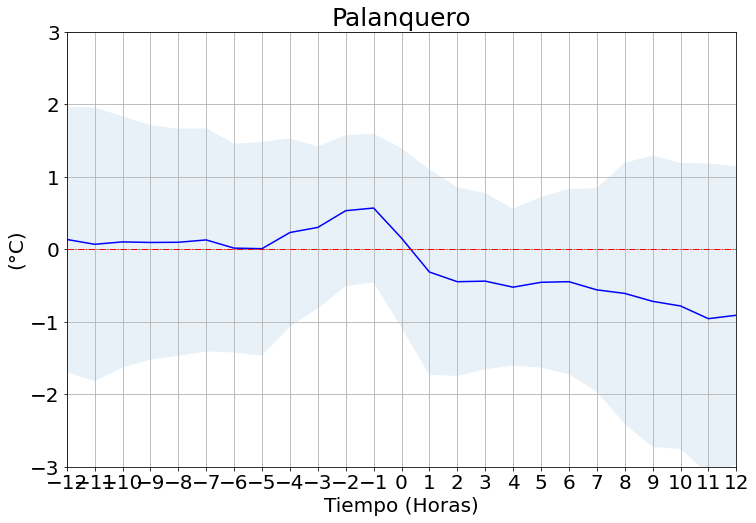

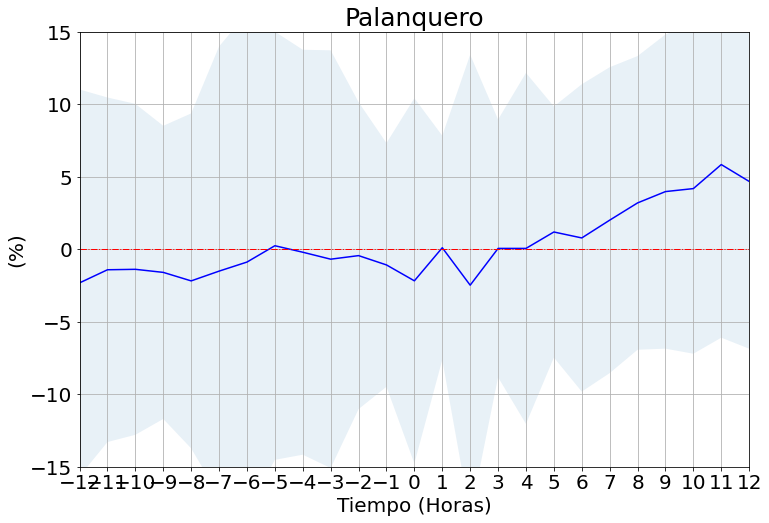

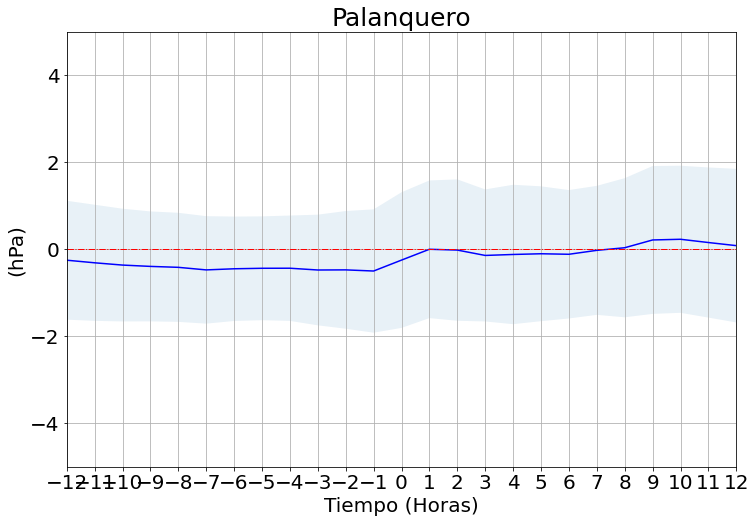

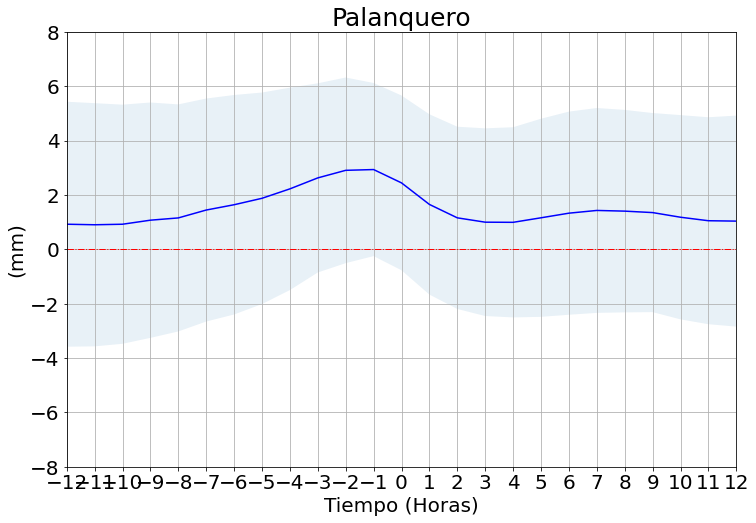

In [20]:
def plot_anomalias(df, anomalia, titulo, name_to_save, ylabel_name, int_horas, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  plt.xticks(df['FECHA_POS'], fontsize= 20)
  plt.plot(df['FECHA_POS'], df[(anomalia, 'mean')], color = 'b')
  plt.fill_between(df['FECHA_POS'], df[(anomalia, 'mean')] + df[(anomalia, 'std')], df[(anomalia, 'mean')] - df[(anomalia, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.xlim([-int_horas, int_horas])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Tiempo (Horas)", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 25)
  #plt.yticks(np.arange(-10, 10, 1))
  plt.yticks(fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)', 'ylimit': [-3, 3]},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)', 'ylimit': [-15, 15]},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)', 'ylimit': [-5, 5]},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_20h_7h_{NOMBRE_ESTACION}_{int_horas}h_nuevo.png', 'ylabel' : '(mm)', 'ylimit': [-8, 8]}
    }

for key in dict_names:
  plot_anomalias(dfAnomalia, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas, dict_names[key]['ylimit'])

# dfAnomalia

# Análisis con los 21 Eventos que tienen todas las variábles metereológicas completas

In [21]:
dfEventos0 = dfCross.loc[dfCross['FECHA_POS'] == 0.]
dfEventos0 = dfEventos0[['FECHA_EVENTO', 'min_t', 'index'] + columns_mean]
dfEventos0['NUMERO_VARS'] = dfEventos0[columns_mean].notnull().sum(axis=1)
dfEventos0

FECHA_EVENTO  min_t  index  TEMP   HUM  PRESION        PWV  \
12   2011-01-15 00:00:00-05:00  206.7      0  25.5  95.0    988.2  57.093333   
37   2011-01-27 23:00:00-05:00  224.2      1  23.7  92.0    990.2  53.513333   
62   2011-02-03 23:00:00-05:00  195.6      2   NaN  98.0    989.0  53.425000   
87   2011-02-10 22:00:00-05:00  212.6      3  26.1  86.0    989.6  57.304167   
112  2011-03-23 00:00:00-05:00  215.6      4  23.3  96.0    990.8  59.511667   
...                        ...    ...    ...   ...   ...      ...        ...   
3712 2017-11-10 23:00:00-05:00  208.2    148  25.3   NaN    987.7  61.280000   
3737 2017-11-11 00:00:00-05:00  202.6    149  25.5   NaN    988.1  60.694167   
3762 2017-11-14 01:00:00-05:00  196.1    150  25.6   NaN    986.5  60.957500   
3787 2017-12-02 22:00:00-05:00  217.7    151  25.0  97.0    988.7  58.975833   
3812 2017-12-29 00:00:00-05:00  202.5    152  25.3  77.0    990.6  57.951667   

      NUMERO_VARS  
12              4  
37              4  
62              3  
87              4  
112             4  
...           ...  
3712            3  
3737            3  
3762            3  
3787            4  
3812            4  

[153 rows x 8 columns]

In [22]:
dfEventos0.count()

FECHA_EVENTO    153
min_t           153
index           153
TEMP            108
HUM              80
PRESION         109
PWV             103
NUMERO_VARS     153
dtype: int64

In [23]:
dfEventos0['NUMERO_VARS'].value_counts()

4    71
0    42
3    38
1     2
Name: NUMERO_VARS, dtype: int64

In [24]:
dfVarsCompletas = dfEventos0.loc[dfEventos0['NUMERO_VARS'] == 4]
indexVarsCompletas = dfVarsCompletas['index']
dfVarsComp = pd.merge(dfCross, indexVarsCompletas, on = 'index', how = 'inner')

dfAnomaliaVarsComp = dfVarsComp[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()
dfAnomaliaVarsComp

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0      -12.0      0.323740  1.620651    -2.107319  12.384695        -0.317863   
1      -11.0      0.222820  1.645436    -1.307423  12.296713        -0.275696   
2      -10.0      0.259984  1.562164    -1.230902  11.563934        -0.290375   
3       -9.0      0.208516  1.405768    -1.320945  10.945387        -0.309989   
4       -8.0      0.239255  1.572819    -1.279608  11.651012        -0.369895   
5       -7.0      0.215440  1.455931    -1.304029  16.540887        -0.409820   
6       -6.0      0.254263  1.385540    -1.093201  18.041944        -0.400548   
7       -5.0      0.207113  1.516932     1.587871  10.379760        -0.375973   
8       -4.0      0.361452  1.268641     1.180425   9.001985        -0.401162   
9       -3.0      0.411702  1.090571     1.499207   7.849074        -0.418234   
10      -2.0      0.608054  1.016457     0.999711   7.637755        -0.331446   
11      -1.0      0.638847  1.025153    -0.473636   6.384318        -0.363323   
12       0.0      0.284554  1.235788    -2.040656  12.132089        -0.122091   
13       1.0     -0.241727  1.387550     0.267556   6.701051         0.152972   
14       2.0     -0.400336  1.298918    -2.442492  16.247629         0.172951   
15       3.0     -0.499854  1.256247     0.331791   7.610208         0.030708   
16       4.0     -0.634642  1.074933     0.305141  12.171238         0.035363   
17       5.0     -0.564998  1.174487     1.564353   7.876706         0.033931   
18       6.0     -0.528071  1.246167     1.453658   7.587678        -0.041688   
19       7.0     -0.677702  1.385063     1.242242  11.440095         0.114051   
20       8.0     -0.676531  1.907940     2.098341  10.495034         0.120818   
21       9.0     -0.752913  2.158810     2.891228  11.237256         0.292948   
22      10.0     -0.807346  1.958157     3.128050  12.045413         0.283445   
23      11.0     -0.949492  2.168424     4.478892  11.847452         0.244373   
24      12.0     -0.900433  2.140979     3.900908  11.489637         0.226393   

             PWV_anomalia            
         std         mean       std  
0   1.285994     0.548234  4.735728  
1   1.285489     0.508678  4.663753  
2   1.274022     0.530060  4.555072  
3   1.256069     0.769005  4.507093  
4   1.303547     1.015365  4.346752  
5   1.339733     1.368404  4.291008  
6   1.269421     1.540758  4.219185  
7   1.276933     1.717563  4.050891  
8   1.284169     2.214287  3.825136  
9   1.292587     2.580464  3.512883  
10  1.368493     2.941477  3.405310  
11  1.398111     2.987533  3.273934  
12  1.521519     2.576722  3.402843  
13  1.558994     1.758272  3.544956  
14  1.659365     1.070952  3.426359  
15  1.514497     0.780144  3.478271  
16  1.638457     0.659383  3.471791  
17  1.584056     0.639664  3.471110  
18  1.479432     0.735063  3.450621  
19  1.489878     0.984899  3.526440  
20  1.516066     1.085233  3.563693  
21  1.634644     1.047059  3.498894  
22  1.596133     0.854554  3.709170  
23  1.585379     0.751634  3.872890  
24  1.603477     0.713642  4.001996

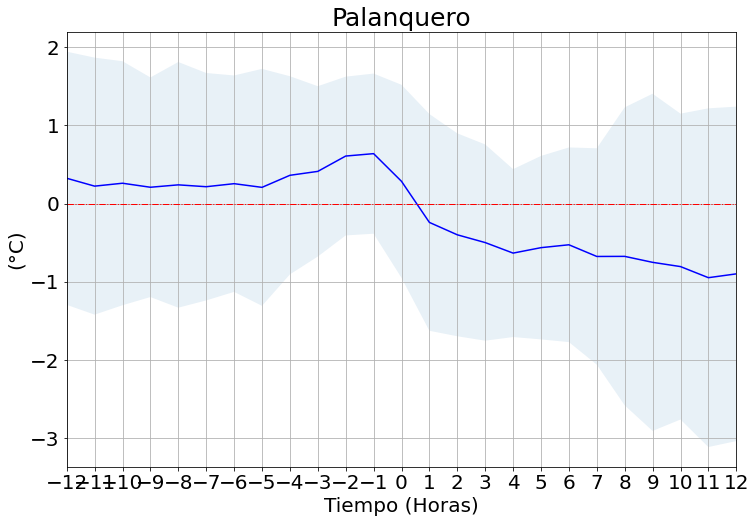

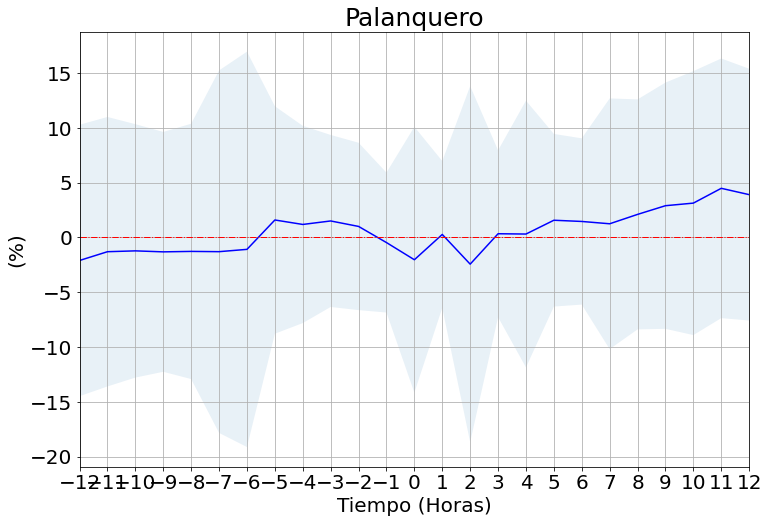

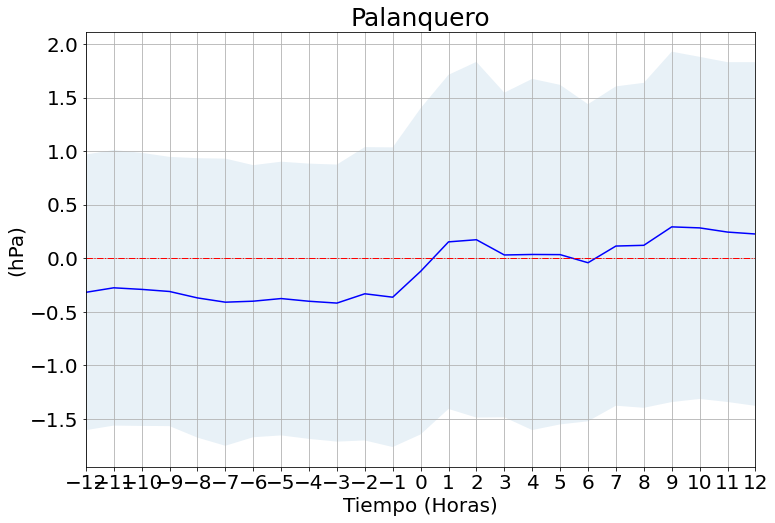

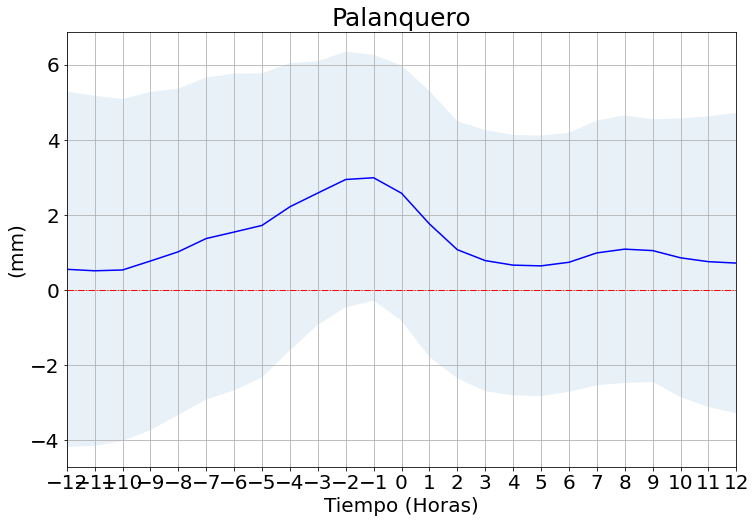

In [25]:
dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)'},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)'},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)'},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(mm)'}
    }

for key in dict_names:
  plot_anomalias(dfAnomaliaVarsComp, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)

In [72]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.cbook import _reshape_2D

# Function adapted from matplotlib.cbook
def my_boxplot_stats(X, whis=1.5, bootstrap=None, labels=None,
                  autorange=False, percents=[25, 75]):

    def _bootstrap_median(data, N=5000):
        # determine 95% confidence intervals of the median
        M = len(data)
        percentiles = [2.5, 97.5]

        bs_index = np.random.randint(M, size=(N, M))
        bsData = data[bs_index]
        estimate = np.median(bsData, axis=1, overwrite_input=True)

        CI = np.percentile(estimate, percentiles)
        return CI

    def _compute_conf_interval(data, med, iqr, bootstrap):
        if bootstrap is not None:
            # Do a bootstrap estimate of notch locations.
            # get conf. intervals around median
            CI = _bootstrap_median(data, N=bootstrap)
            notch_min = CI[0]
            notch_max = CI[1]
        else:

            N = len(data)
            notch_min = med - 1.57 * iqr / np.sqrt(N)
            notch_max = med + 1.57 * iqr / np.sqrt(N)

        return notch_min, notch_max

    # output is a list of dicts
    bxpstats = []

    # convert X to a list of lists
    X = _reshape_2D(X, "X")

    ncols = len(X)
    if labels is None:
        labels = itertools.repeat(None)
    elif len(labels) != ncols:
        raise ValueError("Dimensions of labels and X must be compatible")

    input_whis = whis
    for ii, (x, label) in enumerate(zip(X, labels)):

        # empty dict
        stats = {}
        if label is not None:
            stats['label'] = label

        # restore whis to the input values in case it got changed in the loop
        whis = input_whis

        # note tricksyness, append up here and then mutate below
        bxpstats.append(stats)

        # if empty, bail
        if len(x) == 0:
            stats['fliers'] = np.array([])
            stats['mean'] = np.nan
            stats['med'] = np.nan
            stats['q1'] = np.nan
            stats['q3'] = np.nan
            stats['cilo'] = np.nan
            stats['cihi'] = np.nan
            stats['whislo'] = np.nan
            stats['whishi'] = np.nan
            stats['med'] = np.nan
            continue

        # up-convert to an array, just to be safe
        x = np.asarray(x)

        # arithmetic mean
        stats['mean'] = np.mean(x)

        # median
        med = np.percentile(x, 50)
        ## Altered line
        q1, q3 = np.percentile(x, (percents[0], percents[1]))

        # interquartile range
        stats['iqr'] = q3 - q1
        if stats['iqr'] == 0 and autorange:
            whis = 'range'

        # conf. interval around median
        stats['cilo'], stats['cihi'] = _compute_conf_interval(
            x, med, stats['iqr'], bootstrap
        )

        # lowest/highest non-outliers
        if np.isscalar(whis):
            if np.isreal(whis):
                loval = q1 - whis * stats['iqr']
                hival = q3 + whis * stats['iqr']
            elif whis in ['range', 'limit', 'limits', 'min/max']:
                loval = np.min(x)
                hival = np.max(x)
            else:
                raise ValueError('whis must be a float, valid string, or list '
                                 'of percentiles')
        else:
            loval = np.percentile(x, whis[0])
            hival = np.percentile(x, whis[1])

        # get high extreme
        wiskhi = np.compress(x <= hival, x)
        if len(wiskhi) == 0 or np.max(wiskhi) < q3:
            stats['whishi'] = q3
        else:
            stats['whishi'] = np.max(wiskhi)

        # get low extreme
        wisklo = np.compress(x >= loval, x)
        if len(wisklo) == 0 or np.min(wisklo) > q1:
            stats['whislo'] = q1
        else:
            stats['whislo'] = np.min(wisklo)

        # compute a single array of outliers
        stats['fliers'] = np.hstack([
            np.compress(x < stats['whislo'], x),
            np.compress(x > stats['whishi'], x)
        ])

        # add in the remaining stats
        stats['q1'], stats['med'], stats['q3'] = q1, med, q3

    return bxpstats

def plot_caja_bigote(
    dfAnomaliaVarsComp, ## Dataframe usado para calcular las metricas de cuartiles
    columna_x, ## Nombre de la columna para agrupar
    columna_y, ## Nombre de la columna con la variable
    titulo, ## Titulo de la figura
    rotulo_x, ## Nombre que aparece en el rotulo para el eje X
    rotulo_y, ## Nombre que aparece en el rotulo para el eje Y
    nombre_estacion, ## Nombre de la estación
    nombre_figura, ## Nombre usado para guardar la figura
    path_para_salvar, ## Path para salvar la figura
    lista_xtick=[] ## Colocar para substituir los nombres en el eje X
    ):
  
  stats = {}

  # Compute the boxplot stats (as in the default matplotlib implementation)
  variable_label = dfAnomaliaVarsComp[columna_x].unique()
  variable_label = np.sort(variable_label)
  for var_filter in variable_label:

    df_plot = dfAnomaliaVarsComp[dfAnomaliaVarsComp[columna_x] == var_filter][columna_y].to_numpy()
    stats[var_filter] = my_boxplot_stats(df_plot, percents=[25, 75])[0]

  fig, ax = plt.subplots(1, 1)
  fig.set_size_inches(12,8)
  ax.bxp([stats[numb] for numb in stats.keys()], positions=range(len(variable_label)))
  ax.grid()
  ax.set_xlabel(rotulo_x, fontsize=20)
  ax.set_ylabel(rotulo_y, fontsize=20)
  ax.xaxis.set_tick_params(labelsize=20)
  ax.yaxis.set_tick_params(labelsize=20)
  ax.set_title(nombre_estacion.capitalize(), fontsize= 20)
  if lista_xtick:
    ax.set_xticks(range(0, len(lista_xtick), 1), labels = lista_xtick, fontsize= 20)
  fig.savefig(path_para_salvar + nombre_estacion.capitalize() + "_" + nombre_figura, format='png', bbox_inches = 'tight' )

In [77]:
dfAnomaliaVarsComp["FECHA_POS"]

0    -12
1    -11
2    -10
3     -9
4     -8
5     -7
6     -6
7     -5
8     -4
9     -3
10    -2
11    -1
12     0
13     1
14     2
15     3
16     4
17     5
18     6
19     7
20     8
21     9
22    10
23    11
24    12
Name: FECHA_POS, dtype: int64

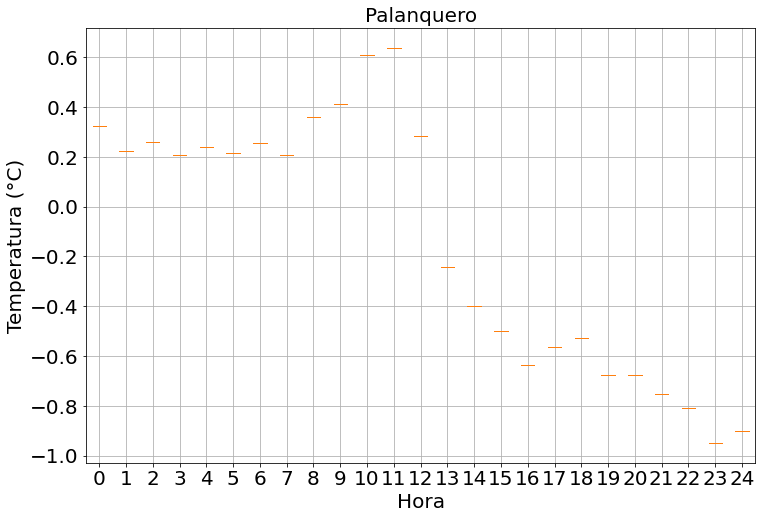

In [75]:
plot_caja_bigote(
    dfAnomaliaVarsComp=dfAnomaliaVarsComp,
    columna_x="FECHA_POS",
    columna_y="TEMP_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Hora",
    rotulo_y="Temperatura (°C)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_temp_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS
)

# Análisis para Dirección del Viento 

In [26]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

# df10mean['DIRVIENTO_mean'] = df10mean.apply(func_dir, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
# df10mean['VELVIENTO_mean'] = df10mean.apply(func_vel, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
df10m['DIRVIENTO'] = df10m.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
df10m['VELVIENTO'] = df10m.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

In [27]:
df10m

FECHA_HORA  X_VIENTO  Y_VIENTO HORA                      FECHA  \
0      2011-01-02 00 -0.020676 -0.144283   00  2011-01-02 00:00:00-05:00   
1      2011-01-02 01 -0.010329 -0.114271   01  2011-01-02 01:00:00-05:00   
2      2011-01-02 02 -0.004356 -0.133153   02  2011-01-02 02:00:00-05:00   
3      2011-01-02 03 -0.013790 -0.164974   03  2011-01-02 03:00:00-05:00   
4      2011-01-02 04 -0.002036 -0.116649   04  2011-01-02 04:00:00-05:00   
...              ...       ...       ...  ...                        ...   
41343  2017-12-31 17  0.627704 -1.636584   17  2017-12-31 17:00:00-05:00   
41344  2017-12-31 19 -0.112232  0.016378   19  2017-12-31 19:00:00-05:00   
41345  2017-12-31 20 -0.102170  0.407207   20  2017-12-31 20:00:00-05:00   
41346  2017-12-31 21  0.194049 -0.179630   21  2017-12-31 21:00:00-05:00   
41347  2017-12-31 23  0.058458 -0.204522   23  2017-12-31 23:00:00-05:00   

        DIRVIENTO  VELVIENTO  
0      188.154988   0.145757  
1      185.165060   0.114737  
2      181.873571   0.133225  
3      184.778293   0.165550  
4      181.000000   0.116667  
...           ...        ...  
41343  159.015918   1.752832  
41344  278.302416   0.113421  
41345  345.914990   0.419829  
41346  132.790163   0.264428  
41347  164.048620   0.212713  

[41348 rows x 7 columns]

# Cargando Eventos e encontrando intervalo m minutos antes y después

## Para 10 minutos

In [28]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, 10) if minute > 0 else range(minute, 0, 10))]

dfEventAnMin = dfEventos.copy()

dfEventAnMin['FECHA_ANTES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAnMin['FECHA_DESPUES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAnMin['FECHA_INTERVALO'] = dfEventAnMin['FECHA_ANTES_MIN'] + dfEventAnMin['FECHA_DESPUES_MIN']
dfEventAnMin = dfEventAnMin.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAnMin['FECHA_POS'] = (dfEventAnMin['FECHA_INTERVALO'] - dfEventAnMin['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAnMin = dfEventAnMin.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAnMin['FECHA'] = dfEventAnMin['FECHA'].astype(str)

dfEventAnMin.head(10)

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  lat_t  \
0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
1 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
2 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
3 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
4 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
5 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
6 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
7 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
8 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
9 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   

                       FECHA  FECHA_POS  
0  2011-01-14 12:20:00-05:00     -720.0  
1  2011-01-14 12:30:00-05:00     -710.0  
2  2011-01-14 12:40:00-05:00     -700.0  
3  2011-01-14 12:50:00-05:00     -690.0  
4  2011-01-14 13:00:00-05:00     -680.0  
5  2011-01-14 13:10:00-05:00     -670.0  
6  2011-01-14 13:20:00-05:00     -660.0  
7  2011-01-14 13:30:00-05:00     -650.0  
8  2011-01-14 13:40:00-05:00     -640.0  
9  2011-01-14 13:50:00-05:00     -630.0

In [29]:
dfCrossPrec = pd.merge(dfEventAnMin, dfPrec, on='FECHA', how = 'left')

dfCrossPrecGroup = dfCrossPrec.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})
dfCrossPrecGroup = dfCrossPrecGroup.rename(columns = {("PREC", "mean") : "PREC_mean", ("PREC", "std") : "PREC_std"}).reset_index()

dfCrossPrecGroup

FECHA_POS      PREC          
                   mean       std
0      -720.0  0.003279  0.022023
1      -710.0  0.004959  0.021799
2      -700.0  0.001653  0.012803
3      -690.0  0.002542  0.015808
4      -680.0  0.004237  0.020230
..        ...       ...       ...
140     680.0  0.023333  0.202809
141     690.0  0.038843  0.372910
142     700.0  0.018852  0.111587
143     710.0  0.004098  0.023698
144     720.0  0.004918  0.021714

[145 rows x 3 columns]

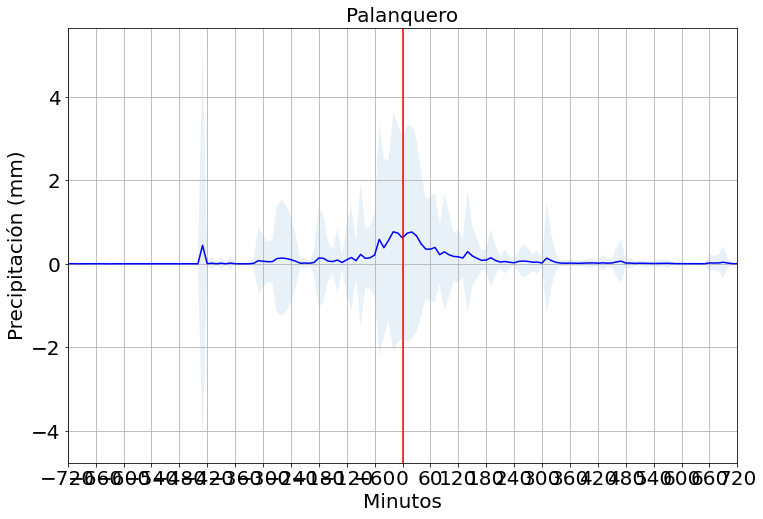

In [30]:
def plot_10m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  # plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PREC' : {'title' : 'Análisis de Precipitación de eventos convectivos', 'name2save' : f'analisis_prec_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Precipitación (mm)'},

    }

for key in dict_names.keys():
  plot_10m_interval(dfCrossPrecGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)


## Para 5 minutos

In [31]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, intervalo_minutes_samples_5m) if minute > 0 else range(minute, 0, intervalo_minutes_samples_5m))]

dfEventAn5Min = dfEventos.copy()

dfEventAn5Min['FECHA_ANTES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAn5Min['FECHA_DESPUES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAn5Min['FECHA_INTERVALO'] = dfEventAn5Min['FECHA_ANTES_MIN'] + dfEventAn5Min['FECHA_DESPUES_MIN']
dfEventAn5Min = dfEventAn5Min.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAn5Min['FECHA_POS'] = (dfEventAn5Min['FECHA_INTERVALO'] - dfEventAn5Min['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAn5Min = dfEventAn5Min.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAn5Min['FECHA'] = dfEventAn5Min['FECHA'].astype(str)

dfEventAn5Min.head(10)

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  lat_t  \
0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
1 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
2 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
3 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
4 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
5 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
6 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
7 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
8 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
9 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   

                       FECHA  FECHA_POS  
0  2011-01-14 12:20:00-05:00     -720.0  
1  2011-01-14 12:25:00-05:00     -715.0  
2  2011-01-14 12:30:00-05:00     -710.0  
3  2011-01-14 12:35:00-05:00     -705.0  
4  2011-01-14 12:40:00-05:00     -700.0  
5  2011-01-14 12:45:00-05:00     -695.0  
6  2011-01-14 12:50:00-05:00     -690.0  
7  2011-01-14 12:55:00-05:00     -685.0  
8  2011-01-14 13:00:00-05:00     -680.0  
9  2011-01-14 13:05:00-05:00     -675.0

In [32]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [33]:
### Calculando Dataframe con la media de todos los datos de PWV

dfPWV_5m['HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[11:16])
dfmean_PWV_5m = dfPWV_5m.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean_PWV_5m.columns if col != 'HORA']
for col in columns_mean:
  dfmean_PWV_5m = dfmean_PWV_5m.rename(columns={col : f'{col}_mean'})

### Cruzamos los datos con los horarios de los eventos y lo separamos

dfCrossPWV_5m = pd.merge(dfEventAn5Min, dfPWV_5m, on='FECHA', how = 'left')
dfCrossPWV_5m['HORA'] = dfCrossPWV_5m['FECHA'].apply(lambda x: x[11:16])

### Cruzamos con los datos de la media
dfCrossPWV_5m = pd.merge(dfCrossPWV_5m, dfmean_PWV_5m, on = 'HORA', how='left')

### Calculamos la anomalia haciendo (dato - media)
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  dfCrossPWV_5m[anomalia] = dfCrossPWV_5m[f'{col}'] - dfCrossPWV_5m[f'{col}_mean'] 

### Calculo de las medias de los eventos
dfCrossPWV_5mGroup = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV" : ["mean", "std"]})
dfCrossPWV_5mGroup = dfCrossPWV_5mGroup.rename(columns = {("PWV", "mean") : "PWV_mean", ("PWV", "std") : "PWV_std"}).reset_index()

### Agrupamiento para anomalias
dfCrossPWV_5mGroup_anom = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV_anomalia" : ["mean", "std"]})
dfCrossPWV_5mGroup_anom = dfCrossPWV_5mGroup_anom.rename(columns = {("PWV_anomalia", "mean") : "PWV_anomalia_mean", ("PWV_anomalia", "std") : "PWV_anomalia_std"}).reset_index()


# dfCrossPWV_5mGroup

## Gráfica de PWV 5 minutos

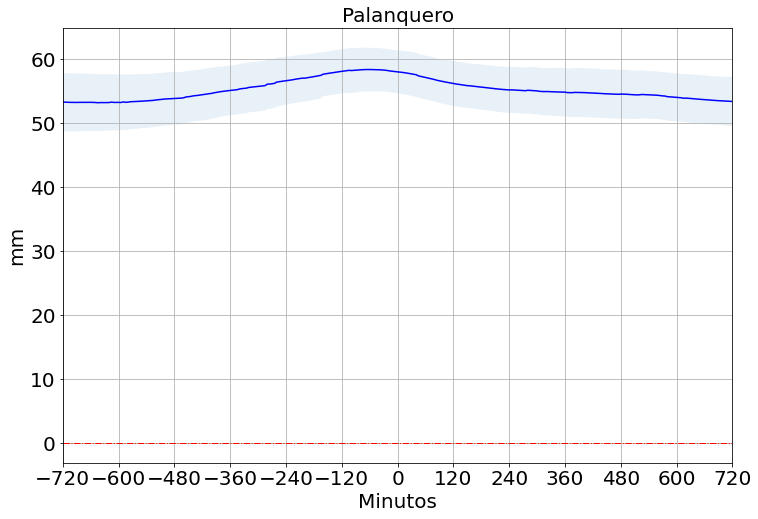

In [34]:
def plot_5m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 24
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  #plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PWV' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

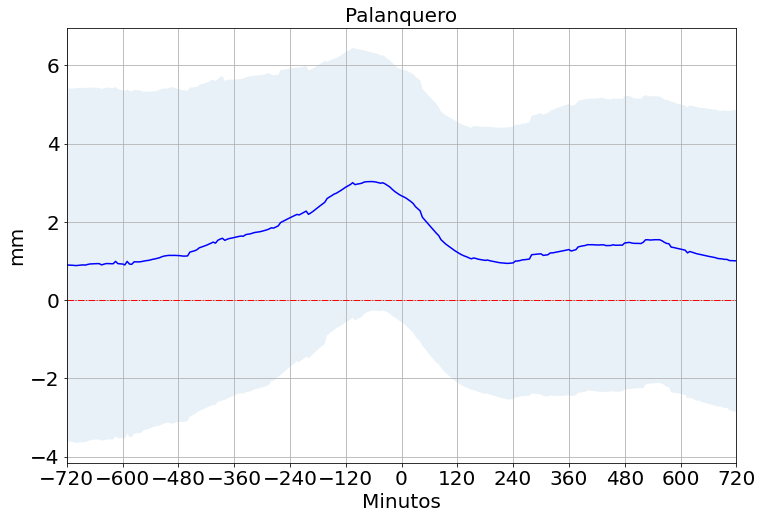

In [35]:
dict_names = {'PWV_anomalia' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_anomalia_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup_anom, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

## Análisis de percentiles - Precipitación

In [36]:
def plot_percentil_interval_prec(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency],fontsize=20)
  plt.yticks(fontsize=20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  #plt.plot(df['FECHA_POS'], df[.5], label = f"Percentil")
  ## Gráfica del promedio 
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], linestyle = '--')

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)
  
  plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  plt.ylim(0,1.2)
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos",fontsize=20)
  plt.ylabel(ylabel_name,fontsize=20)
  plt.title("Palanquero",fontsize=20)
  plt.legend(fontsize=20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


<ipython-input-37-eeefdfe27620>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")


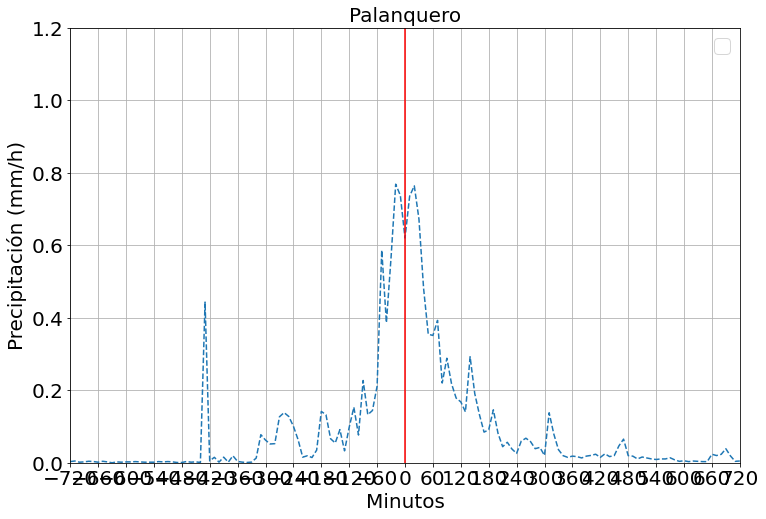

In [37]:
list_percentil = [ 0.05, .1, .20, .25, .50, .75, .80, .90, 0.95]
dfCrossPrecNotNan = dfCrossPrec.dropna().reset_index()
dfPercentilPrec= dfCrossPrecNotNan.groupby("FECHA_POS")['PREC'].quantile(list_percentil).reset_index()
dfAggPrec = dfCrossPrecNotNan.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})

dfPercentilPrec = dfPercentilPrec.pivot(index='FECHA_POS', columns='level_1')['PREC'].reset_index()
dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")

dict_names = {'title' : 'Análisis de precipitación', 
              'name2save' : f'analisis_precipitacion_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 
              'ylabel' : 'Precipitación (mm/h)'
              }

plot_percentil_interval_prec(dfPercentilPrec, [.10, .10], 'PREC', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes)

In [38]:
dfCrossPrecNotNan[dfCrossPrecNotNan['FECHA_POS'] == 0]

index                FECHA_HORA              FECHA_EVENTO  min_t  \
72        72 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
217      217 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2   
362      362 2011-02-03 23:00:00-05:00 2011-02-03 23:20:00-05:00  195.6   
507      507 2011-02-10 22:00:00-05:00 2011-02-10 21:40:00-05:00  212.6   
652      652 2011-03-23 00:00:00-05:00 2011-03-22 23:40:00-05:00  215.6   
...      ...                       ...                       ...    ...   
15816  21532 2017-11-10 23:00:00-05:00 2017-11-10 23:20:00-05:00  208.2   
15961  21677 2017-11-11 00:00:00-05:00 2017-11-10 23:40:00-05:00  202.6   
16106  21822 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1   
16251  21967 2017-12-02 22:00:00-05:00 2017-12-02 21:40:00-05:00  217.7   
16396  22112 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

        lon_t  lat_t                      FECHA  FECHA_POS  PREC  
72    -74.836  5.627  2011-01-15 00:20:00-05:00        0.0   0.0  
217   -74.693  5.627  2011-01-27 23:20:00-05:00        0.0   0.0  
362   -74.836  5.627  2011-02-03 23:20:00-05:00        0.0   1.9  
507   -74.836  5.627  2011-02-10 21:40:00-05:00        0.0   0.0  
652   -74.836  5.341  2011-03-22 23:40:00-05:00        0.0   0.5  
...       ...    ...                        ...        ...   ...  
15816 -74.693  5.484  2017-11-10 23:20:00-05:00        0.0   0.0  
15961 -74.836  5.341  2017-11-10 23:40:00-05:00        0.0   0.0  
16106 -74.693  5.627  2017-11-14 00:40:00-05:00        0.0   0.0  
16251 -74.836  5.484  2017-12-02 21:40:00-05:00        0.0   0.0  
16396 -74.836  5.484  2017-12-28 23:40:00-05:00        0.0   0.0  

[109 rows x 9 columns]

# Análisis de Viento

In [39]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

In [40]:
dfEventAnMin['HORA_MINUTO'] = dfEventAnMin['FECHA'].apply(lambda x: x[11:16])
dfEventAnMin

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
22180 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
22181 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
22182 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
22183 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
22184 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

       lat_t                      FECHA  FECHA_POS HORA_MINUTO  
0      5.627  2011-01-14 12:20:00-05:00     -720.0       12:20  
1      5.627  2011-01-14 12:30:00-05:00     -710.0       12:30  
2      5.627  2011-01-14 12:40:00-05:00     -700.0       12:40  
3      5.627  2011-01-14 12:50:00-05:00     -690.0       12:50  
4      5.627  2011-01-14 13:00:00-05:00     -680.0       13:00  
...      ...                        ...        ...         ...  
22180  5.484  2017-12-29 11:00:00-05:00      680.0       11:00  
22181  5.484  2017-12-29 11:10:00-05:00      690.0       11:10  
22182  5.484  2017-12-29 11:20:00-05:00      700.0       11:20  
22183  5.484  2017-12-29 11:30:00-05:00      710.0       11:30  
22184  5.484  2017-12-29 11:40:00-05:00      720.0       11:40  

[22185 rows x 8 columns]

In [41]:
dfViento['HORA_MINUTO'] = dfViento['FECHA'].apply(lambda x: x[11:16])
dfViento

dfVientoMean = dfViento.groupby('HORA_MINUTO').agg('mean').reset_index(level=0)
dfVientoMean = dfVientoMean.rename(columns={"VELVIENTO":"VELVIENTO_mean"})

In [42]:
dfCrossVientos = pd.merge(dfEventAnMin[['HORA_MINUTO', 'FECHA_POS', 'FECHA']], dfViento[[col for col in dfViento.columns if col != "HORA_MINUTO" ]], on='FECHA', how = 'left')
dfCrossVientos = pd.merge(dfCrossVientos, dfVientoMean[['HORA_MINUTO', 'VELVIENTO_mean']], on='HORA_MINUTO', how = 'left')

### Cálculo de la anomalia
dfCrossVientos['VEL_VIENTO_anomalia'] = dfCrossVientos['VELVIENTO'] - dfCrossVientos['VELVIENTO_mean']

dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : "mean", "VEL_VIENTO_anomalia" : "std"}).reset_index()
# dfCrossVientosGroup
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()

dfCrossVientosGroup2 = pd.DataFrame()
dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "std") ]
dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "mean") ]

In [43]:
# dfCrossVientos = pd.merge(dfEventAnMin, dfViento, on='FECHA', how = 'left')
# dfCrossVientos = dfCrossVientos.loc[dfCrossVientos['FECHA_POS'] == 240]
# dfCrossVientos["X_VIENTO_STD"] = dfCrossVientos["X_VIENTO"]
# dfCrossVientos["Y_VIENTO_STD"] = dfCrossVientos["Y_VIENTO"]


# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})
# dfCrossVientosGroup2 = pd.DataFrame()
# dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
# dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VELVIENTO", "std") ]
# dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VELVIENTO", "mean") ]

# dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})

# dfCrossVientosGroup['DIR_VIENTO'] = dfCrossVientosGroup.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['DIR_VIENTO'] = (dfCrossVientosGroup['DIR_VIENTO'] + 180.0) % 360
# dfCrossVientosGroup['VEL_VIENTO'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_MEAN'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_STD'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO_STD', y='Y_VIENTO_STD', axis=1)

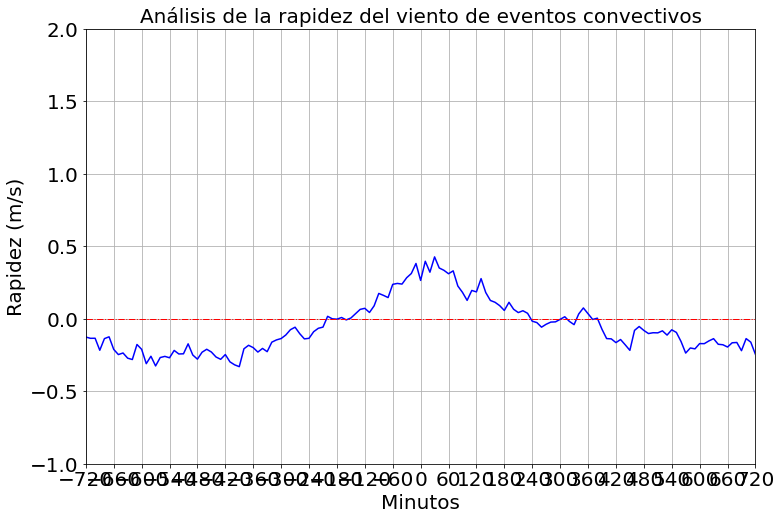

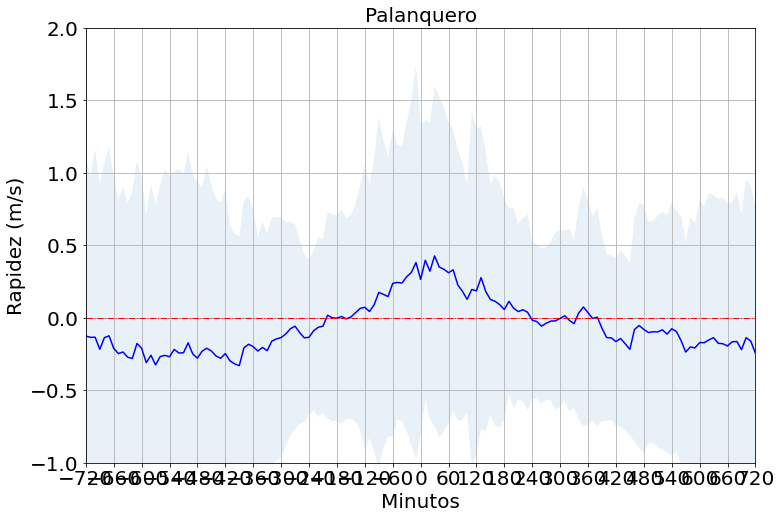

In [44]:
def plot_10m_interval_v2(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  # plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title(titulo, fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

def plot_dir_viento_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(range(0, 361, 45), fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'DIR_VIENTO' : {'title' : 'Análisis de la dirección del viento de eventos convectivos', 'name2save' : f'analisis_dir_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Dirección (°)'},
              'VEL_VIENTO' : {'title' : 'Análisis de la rapidez del viento de eventos convectivos', 'name2save' : f'analisis_vel_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
              'VEL_VIENTO_2' : {'title' : 'Palanquero', 'name2save' : f'analisis_vel_viento_std_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
             }

# key = 'DIR_VIENTO'
# plot_dir_viento_interval(dfCrossVientosGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit = [0, 360], has_std=False)

key = 'VEL_VIENTO'
plot_10m_interval_v2(dfCrossVientosGroup2, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=False)

key = 'VEL_VIENTO_2'
plot_10m_interval_v2(dfCrossVientosGroup2, 'VEL_VIENTO', dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=True)

## Anáisis de Percentiles

In [45]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           12:20     -720.0  2011-01-14 12:20:00-05:00        174.0   
1           12:30     -710.0  2011-01-14 12:30:00-05:00        100.0   
2           12:40     -700.0  2011-01-14 12:40:00-05:00         73.0   
3           12:50     -690.0  2011-01-14 12:50:00-05:00         58.0   
4           13:00     -680.0  2011-01-14 13:00:00-05:00         28.0   
...           ...        ...                        ...          ...   
22180       11:00      680.0  2017-12-29 11:00:00-05:00        266.0   
22181       11:10      690.0  2017-12-29 11:10:00-05:00        312.0   
22182       11:20      700.0  2017-12-29 11:20:00-05:00        306.0   
22183       11:30      710.0  2017-12-29 11:30:00-05:00        328.0   
22184       11:40      720.0  2017-12-29 11:40:00-05:00        344.0   

       VELVIENTO     FECHA_HORA  X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.2  2011-01-14 12 -0.020906  0.198904        1.412595   
1            0.2  2011-01-14 12 -0.196962  0.034730        1.427715   
2            0.2  2011-01-14 12 -0.191261 -0.058474        1.449351   
3            0.1  2011-01-14 12 -0.084805 -0.052992        1.761493   
4            0.2  2011-01-14 13 -0.093894 -0.176590        1.480286   
...          ...            ...       ...       ...             ...   
22180        1.0  2017-12-29 11  0.997564  0.069756        1.272294   
22181        1.2  2017-12-29 11  0.891774 -0.802957        1.277909   
22182        1.5  2017-12-29 11  1.213525 -0.881678        1.298138   
22183        1.7  2017-12-29 11  0.900863 -1.441682        1.336702   
22184        1.6  2017-12-29 11  0.441020 -1.538019        1.364427   

       VEL_VIENTO_anomalia  
0                -1.212595  
1                -1.227715  
2                -1.249351  
3                -1.661493  
4                -1.280286  
...                    ...  
22180            -0.272294  
22181            -0.077909  
22182             0.201862  
22183             0.363298  
22184             0.235573  

[22185 rows x 10 columns]

In [46]:
def plot_percentil_interval(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  # plt.plot(df['FECHA_POS'], df[0.5], label = f"Percentil {0.5}")
  ## Gráfica del promedio 
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)
  
  # plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)
  plt.legend()

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


In [47]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           12:20     -720.0  2011-01-14 12:20:00-05:00        174.0   
1           12:30     -710.0  2011-01-14 12:30:00-05:00        100.0   
2           12:40     -700.0  2011-01-14 12:40:00-05:00         73.0   
3           12:50     -690.0  2011-01-14 12:50:00-05:00         58.0   
4           13:00     -680.0  2011-01-14 13:00:00-05:00         28.0   
...           ...        ...                        ...          ...   
22180       11:00      680.0  2017-12-29 11:00:00-05:00        266.0   
22181       11:10      690.0  2017-12-29 11:10:00-05:00        312.0   
22182       11:20      700.0  2017-12-29 11:20:00-05:00        306.0   
22183       11:30      710.0  2017-12-29 11:30:00-05:00        328.0   
22184       11:40      720.0  2017-12-29 11:40:00-05:00        344.0   

       VELVIENTO     FECHA_HORA  X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.2  2011-01-14 12 -0.020906  0.198904        1.412595   
1            0.2  2011-01-14 12 -0.196962  0.034730        1.427715   
2            0.2  2011-01-14 12 -0.191261 -0.058474        1.449351   
3            0.1  2011-01-14 12 -0.084805 -0.052992        1.761493   
4            0.2  2011-01-14 13 -0.093894 -0.176590        1.480286   
...          ...            ...       ...       ...             ...   
22180        1.0  2017-12-29 11  0.997564  0.069756        1.272294   
22181        1.2  2017-12-29 11  0.891774 -0.802957        1.277909   
22182        1.5  2017-12-29 11  1.213525 -0.881678        1.298138   
22183        1.7  2017-12-29 11  0.900863 -1.441682        1.336702   
22184        1.6  2017-12-29 11  0.441020 -1.538019        1.364427   

       VEL_VIENTO_anomalia  
0                -1.212595  
1                -1.227715  
2                -1.249351  
3                -1.661493  
4                -1.280286  
...                    ...  
22180            -0.272294  
22181            -0.077909  
22182             0.201862  
22183             0.363298  
22184             0.235573  

[22185 rows x 10 columns]

<ipython-input-48-f29ad4f9f982>:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")


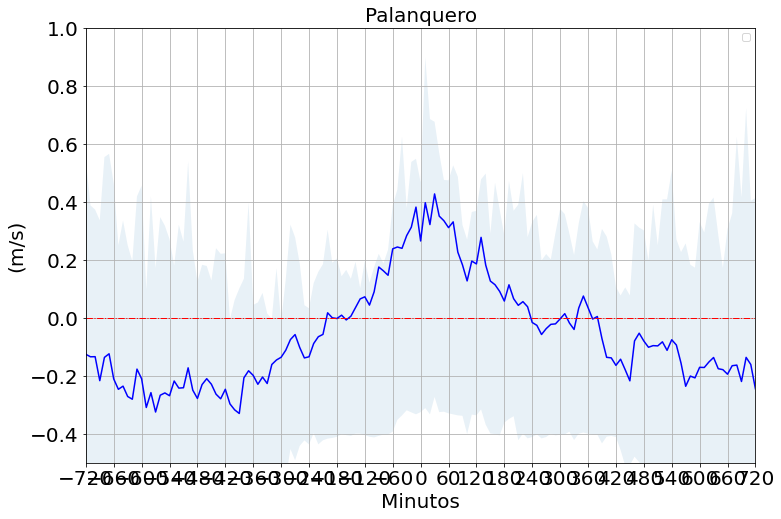

In [48]:
list_percentil = [.10, .20,.25, .50, .75, .80, .90]
dfPercentilViento = dfCrossVientos.groupby("FECHA_POS")['VEL_VIENTO_anomalia'].quantile(list_percentil).reset_index()
dfAggViento = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]})

dfPercentilViento = dfPercentilViento.pivot(index='FECHA_POS', columns='level_1')['VEL_VIENTO_anomalia'].reset_index()
dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")

dict_names = {'title' : 'Análisis de rapidez del viento', 
              'name2save' : f'analisis_rapidez_viento_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_anomalia_mean.png', 
              'ylabel' : '(m/s)'
              }

plot_percentil_interval(dfPercentilViento, [.25, .75], 'VEL_VIENTO_anomalia', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes, ylimit=[-.5, 1])

# Análisis de viento por hora

In [49]:
dfCrossVientosHora = pd.merge(dfEventAn, df10m, on='FECHA', how = 'left')

dfCrossVientosHora
# dfCrossVientosHoraGroup = dfCrossVientosHora.groupby("FECHA_POS").agg({"X_VIENTO" : "mean", "Y_VIENTO" : "mean"}).reset_index()

dfCrossVientosHora['DIR_VIENTO'] = dfCrossVientosHora.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
dfCrossVientosHora['DIR_VIENTO'] = (dfCrossVientosHora['DIR_VIENTO'] + 180.0) % 360
dfCrossVientosHora['VEL_VIENTO'] = dfCrossVientosHora.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

dfCrossVientosHora

index              FECHA_EVENTO                 FECHA_MIN  min_t  \
0         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
1         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
2         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
3         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
4         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
...     ...                       ...                       ...    ...   
3820    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
3821    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
3822    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
3823    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
3824    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

       lon_t  lat_t                      FECHA  FECHA_POS     FECHA_HORA  \
0    -74.836  5.627  2011-01-14 12:00:00-05:00      -12.0  2011-01-14 12   
1    -74.836  5.627  2011-01-14 13:00:00-05:00      -11.0  2011-01-14 13   
2    -74.836  5.627  2011-01-14 14:00:00-05:00      -10.0  2011-01-14 14   
3    -74.836  5.627  2011-01-14 15:00:00-05:00       -9.0  2011-01-14 15   
4    -74.836  5.627  2011-01-14 16:00:00-05:00       -8.0  2011-01-14 16   
...      ...    ...                        ...        ...            ...   
3820 -74.836  5.484  2017-12-29 08:00:00-05:00        8.0  2017-12-29 08   
3821 -74.836  5.484  2017-12-29 09:00:00-05:00        9.0  2017-12-29 09   
3822 -74.836  5.484  2017-12-29 10:00:00-05:00       10.0  2017-12-29 10   
3823 -74.836  5.484  2017-12-29 11:00:00-05:00       11.0  2017-12-29 11   
3824 -74.836  5.484  2017-12-29 12:00:00-05:00       12.0  2017-12-29 12   

      X_VIENTO  Y_VIENTO HORA   DIRVIENTO  VELVIENTO  DIR_VIENTO  VEL_VIENTO  
0    -0.115230 -0.030312   12  255.261991   0.119150   75.261991    0.119150  
1    -0.117261 -0.009405   13  265.414524   0.117638   85.414524    0.117638  
2    -0.099302 -0.065043   14  236.775194   0.118707   56.775194    0.118707  
3    -0.035374 -0.100970   15  199.307196   0.106987   19.307196    0.106987  
4    -0.008371 -0.114574   16  184.178717   0.114880    4.178717    0.114880  
...        ...       ...  ...         ...        ...         ...         ...  
3820 -0.392705 -0.380243   08  225.923677   0.546627   45.923677    0.546627  
3821 -0.212765  0.613440   09  340.871446   0.649290  160.871446    0.649290  
3822  0.872521  0.053793   10   86.472029   0.874178  266.472029    0.874178  
3823  0.709432 -1.064120   11  146.309212   1.278923  326.309212    1.278923  
3824  0.610242 -1.568617   12  158.742381   1.683138  338.742381    1.683138  

[3825 rows x 16 columns]

In [50]:
def plot_windrose(df, title, path_to_save):
  ax = WindroseAxes.from_ax()

  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 5, 0.5), edgecolor='white', cmap=cm.cool)
  ax.set_legend(loc = 3)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
  plt.title(title)
  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
  plt.show()

In [51]:
posHoras = set(list(dfCrossVientosHora['FECHA_POS']))
posHoras

{-12.0,
 -11.0,
 -10.0,
 -9.0,
 -8.0,
 -7.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0}

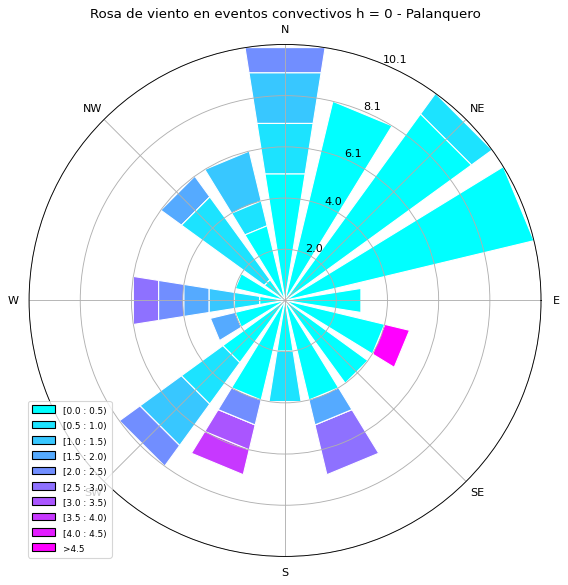

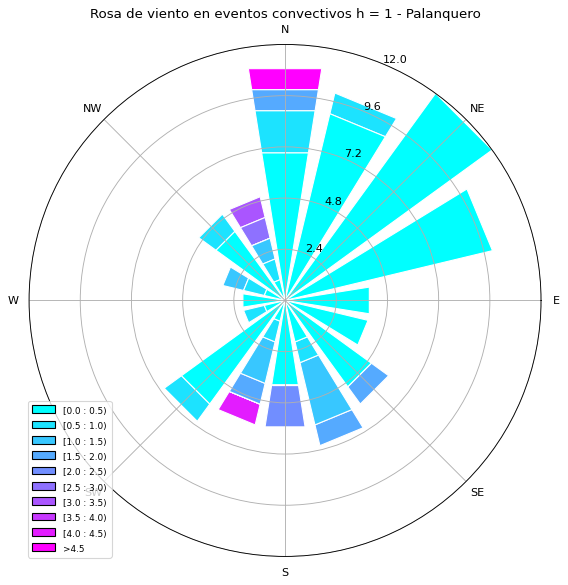

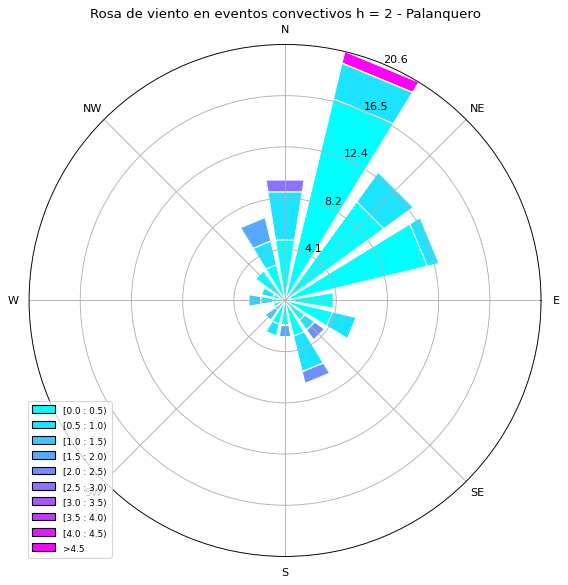

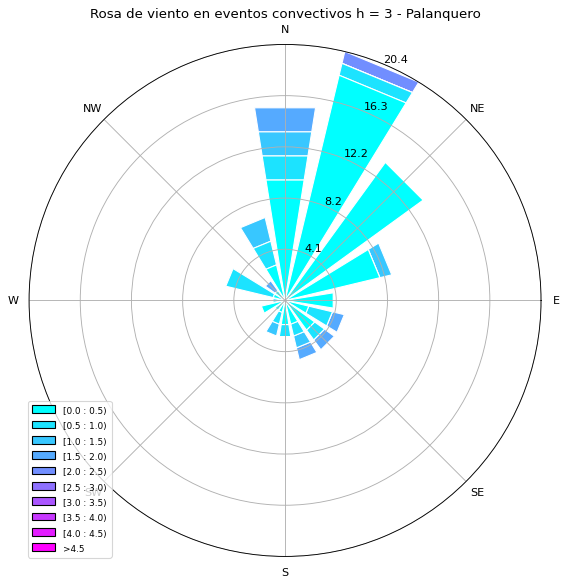

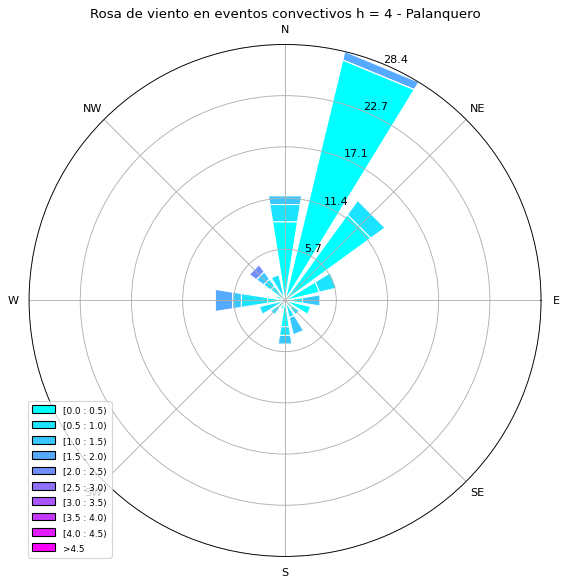

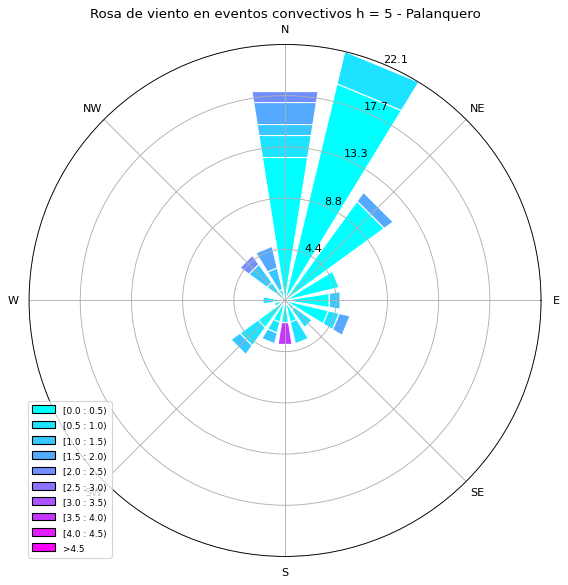

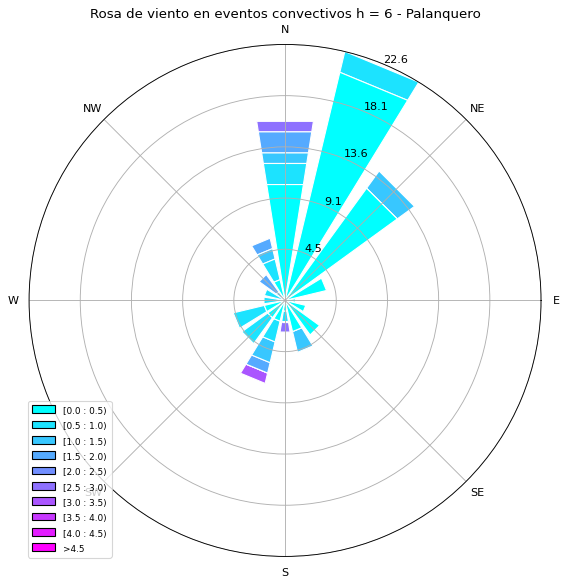

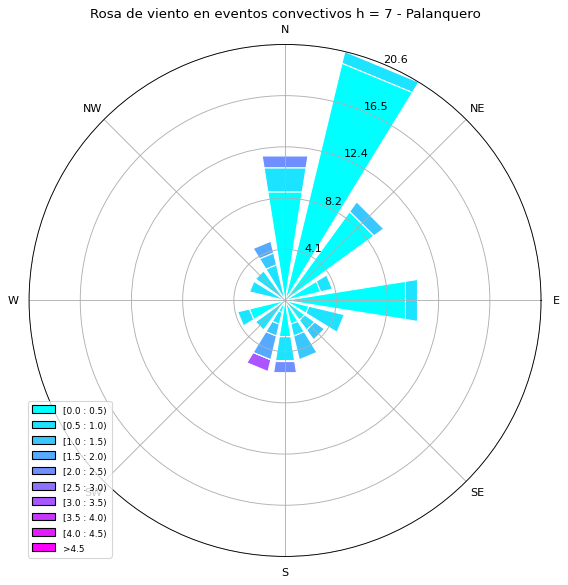

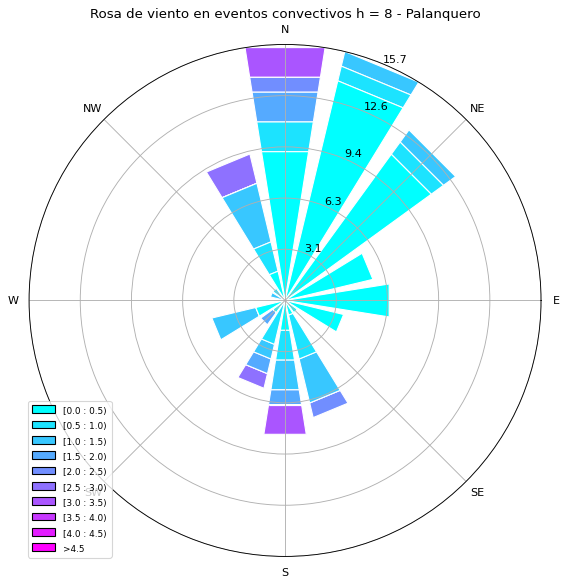

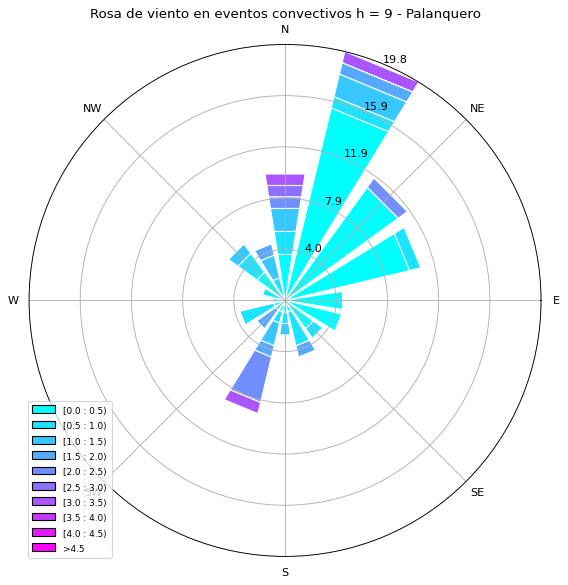

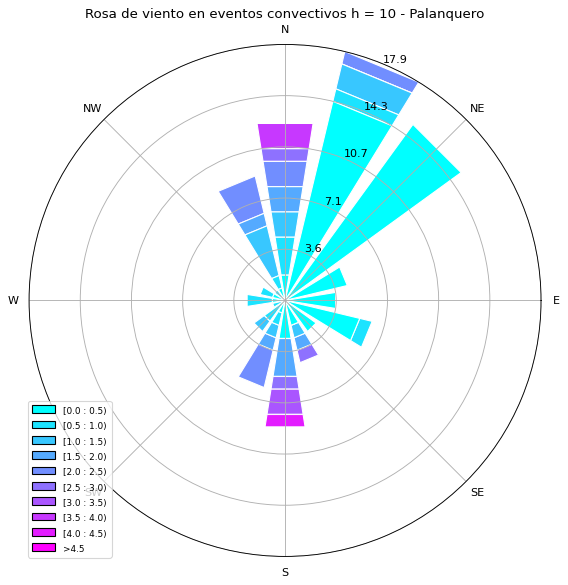

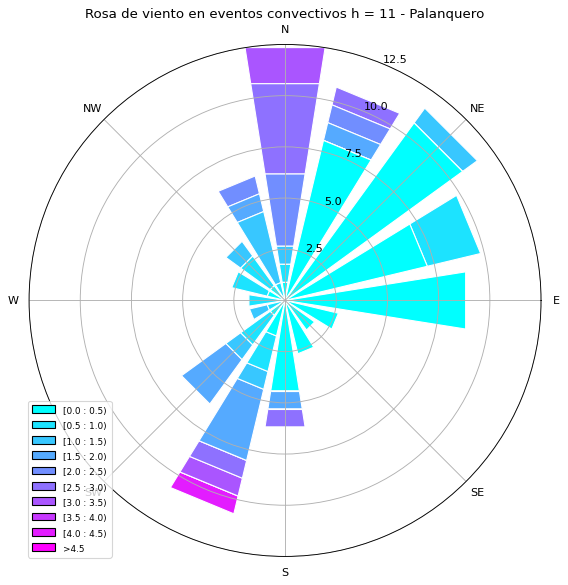

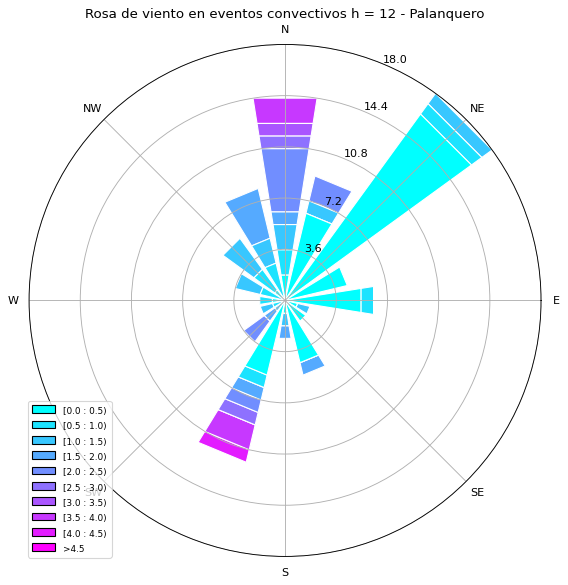

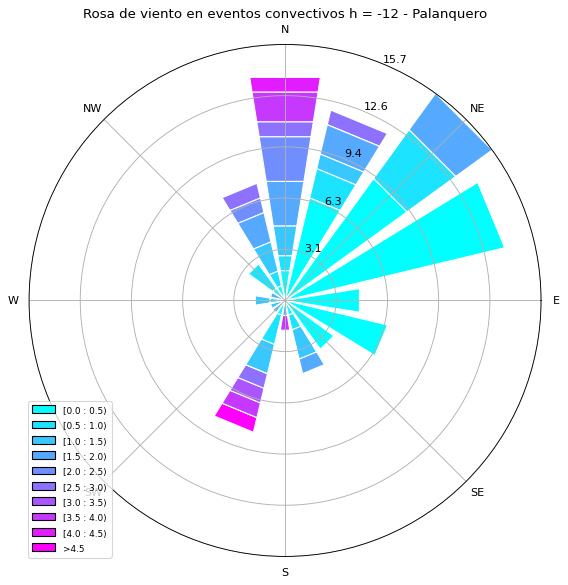

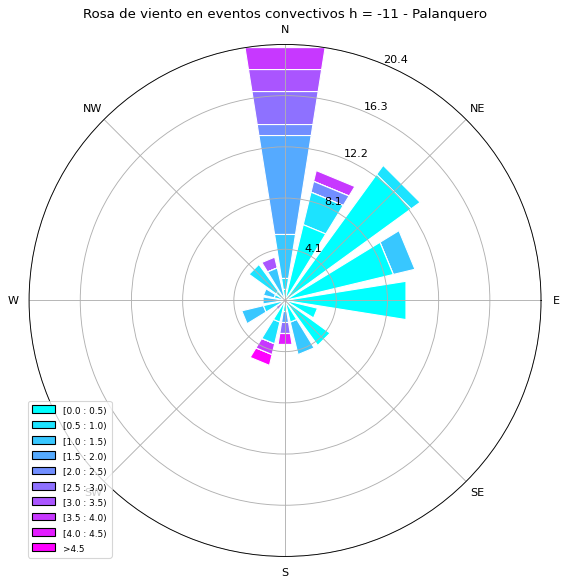

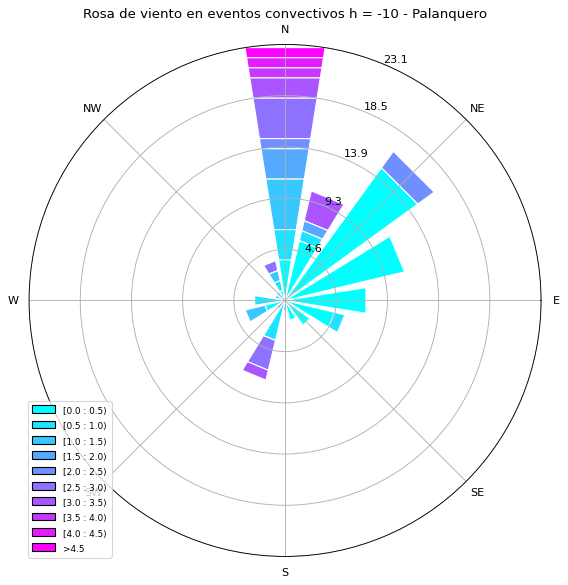

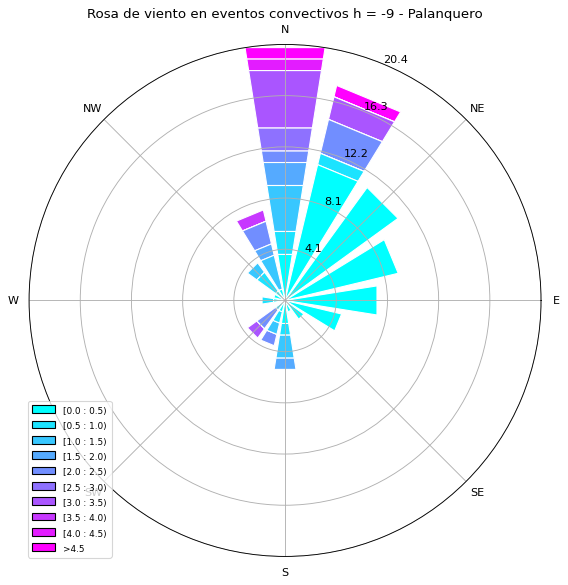

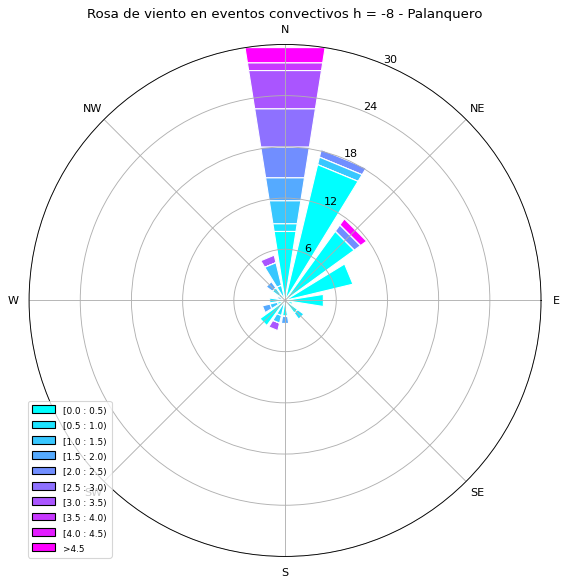

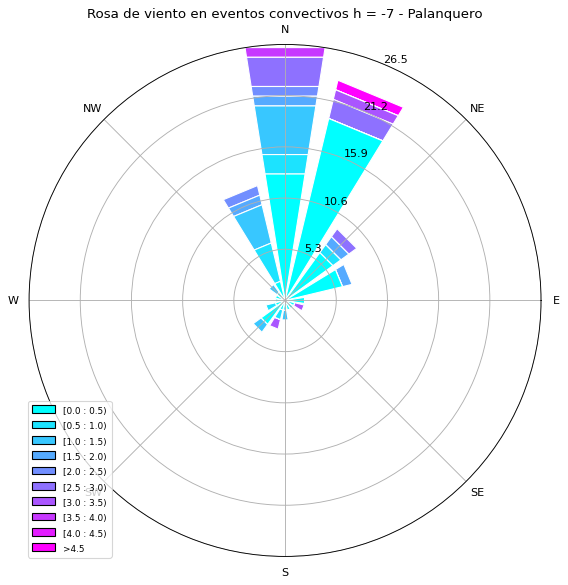

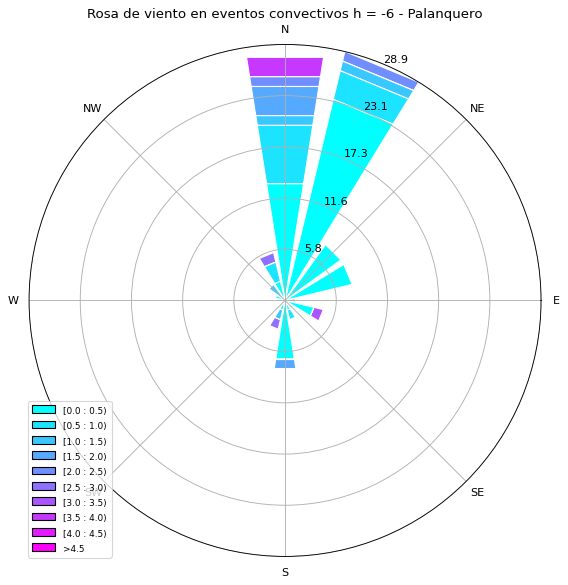

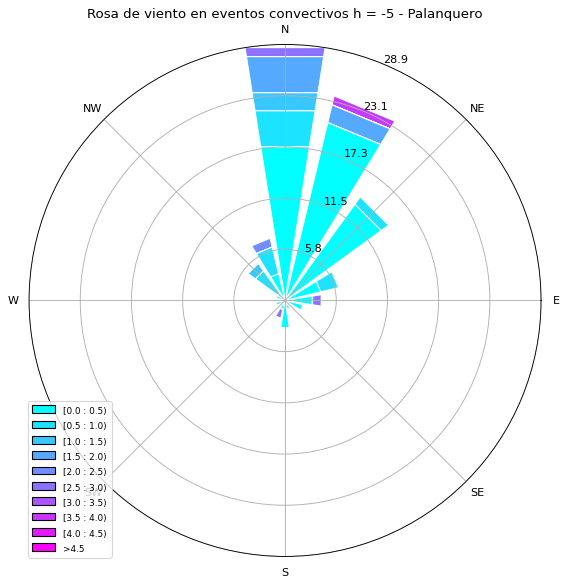

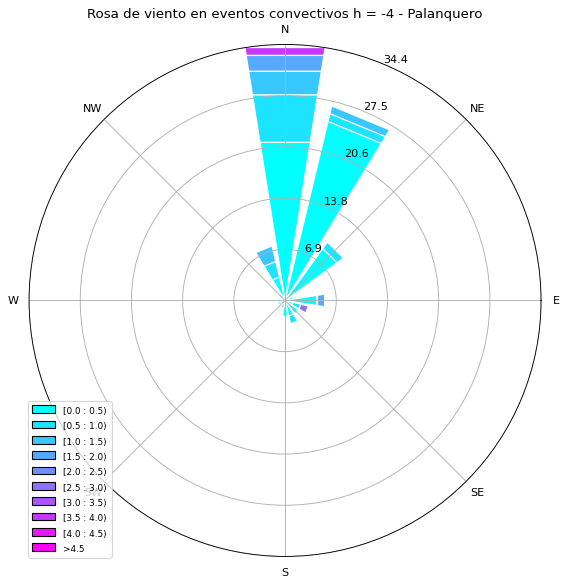

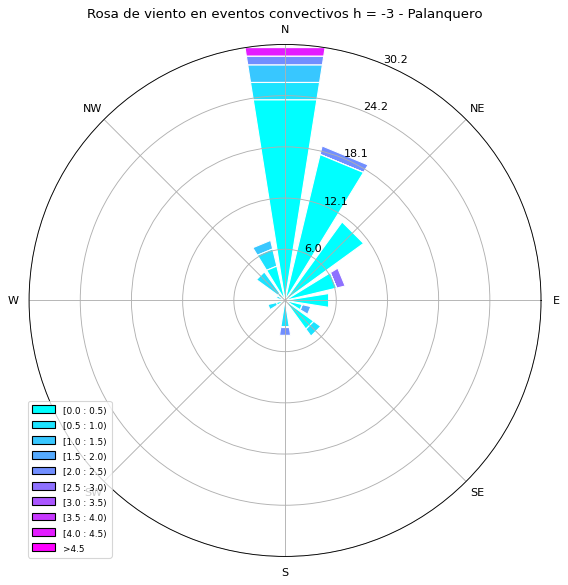

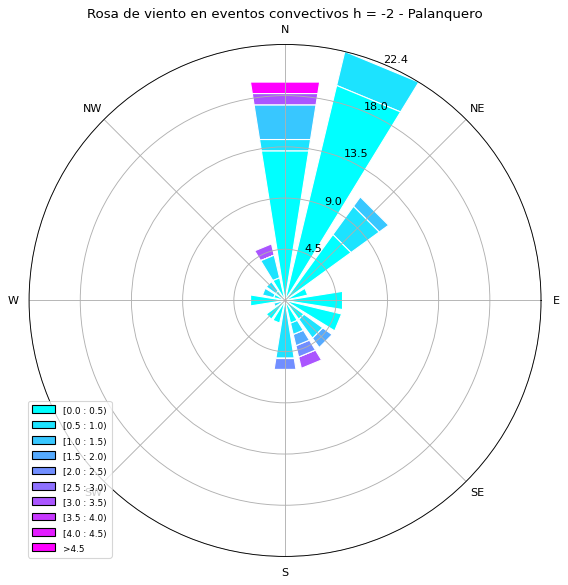

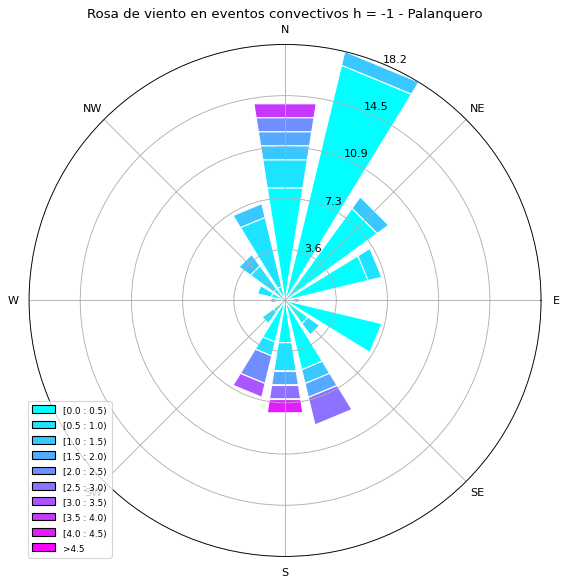

In [52]:
for hora in posHoras:
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'Rosa de viento en eventos convectivos h = {int(hora)} - {NOMBRE_ESTACION.capitalize()}'
  path_to_save = f'windrose_eventos_convectivos_hora_20h_7h_{int(hora)}_{NOMBRE_ESTACION.lower()}.png'
    
  plot_windrose(dft, title, path_to_save)

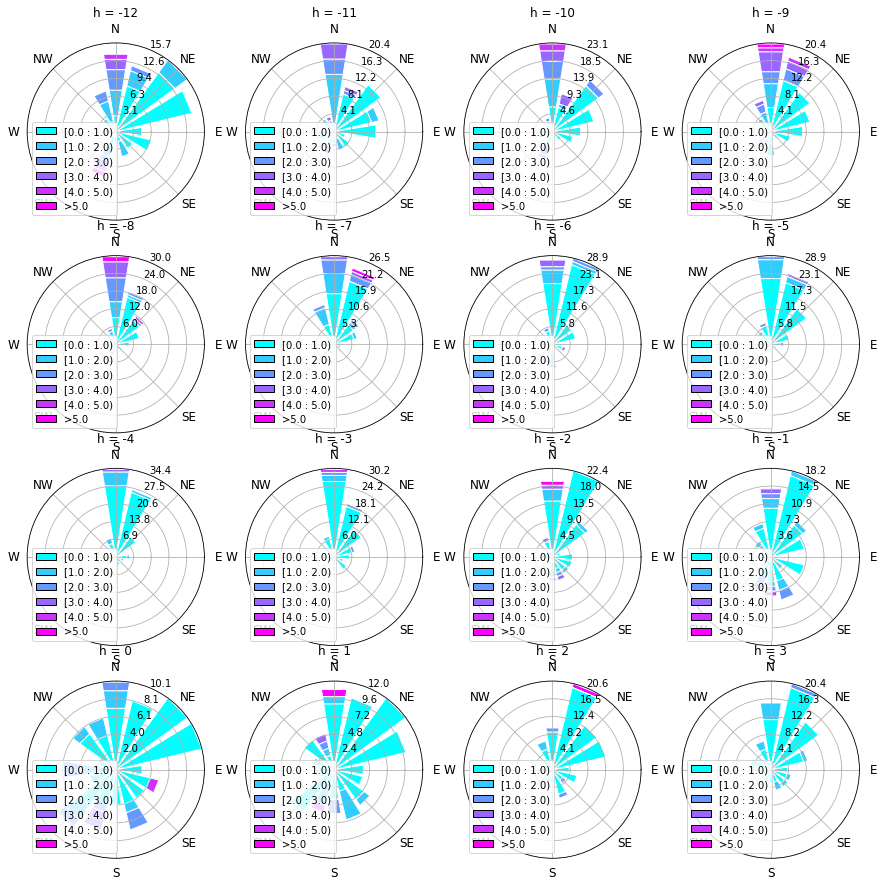

In [53]:
def plot_windrose_2(df, title, ax):
  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 6), edgecolor='white', cmap=cm.cool)
  ax.legend(loc = 3, fontsize= 10)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'], fontsize= 12)
  ax.set_title(title)


fig, axs = plt.subplots(4, 4,figsize=(15,15),  subplot_kw=dict(projection="windrose"))
horas = list(posHoras)
horas.sort()

for ax, hora in zip(axs.reshape(16), horas):
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'h = {int(hora)}'
  plot_windrose_2(dft, title, ax)

path_to_save = f'subplot_vientos_20h_7h_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
plt.show()

# Gráficos multivariables en único Plot

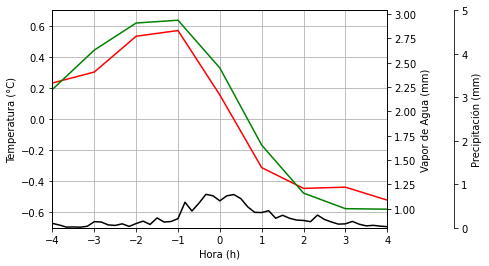

In [54]:
fig, ax = plt.subplots()
ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
ax.set_ylim(-0.7, 0.7)

ax2=ax.twinx()
ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PWV_anomalia', 'mean')], c = 'green')

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes', 1.2))
ax3.plot(dfCrossPrecGroup['FECHA_POS']/60.0, dfCrossPrecGroup[('PREC', 'mean')], c = 'black')
ax3.set_ylim(0, 5)

ax.set_xlim(-4, 4)
ax.grid()

ax.set_ylabel("Temperatura (°C)")
ax2.set_ylabel("Vapor de Agua (mm)")
ax3.set_ylabel("Precipitación (mm)")
ax.set_xlabel("Hora (h)")

path_to_save = f'temp_vs_pwv_vs_prec_anomalias_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )

KeyError: ignored

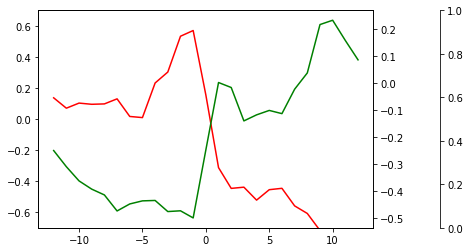

In [55]:
fig, ax = plt.subplots()
ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
ax.set_ylim(-0.7, 0.7)

ax2=ax.twinx()
ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PRESION_anomalia', 'mean')], c = 'green')

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes', 1.2))
ax3.plot(dfCrossVientosGroup2['FECHA_POS']/60.0, dfCrossVientosGroup['VEL_VIENTO'], c = 'black')
# ax3.set_ylim(0, 0.5)

ax.set_xlim(-4, 4)
ax.grid()

ax.set_ylabel("Temperatura (°C)")
ax2.set_ylabel("Presión (hPa)")
ax3.set_ylabel("Velocidad del viento (m/s)")
ax.set_xlabel("Hora (h)")

path_to_save = f'temp_vs_pres_vs_velviento_anomalias_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )